<a href="https://colab.research.google.com/github/subhabrata-ghosh-1988/credit-card-fraud-detection/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fraudulent activities have increased severalfold, with around 52,304 cases of credit/debit card fraud reported in FY'19 alone. Due to this steep increase in banking frauds, it is the need of the hour to detect these fraudulent transactions in time in order to help consumers as well as banks, who are losing their credit worth each day. Every fraudulent credit card transaction that occur is a direct financial loss to the bank as the bank is responsible for the fraud transactions as well it also affects the overall customer satisfaction adversely.

**The aim of this project is to identify and predict fraudulent credit card transactions using machine learning models.**

#### **Contributor(s)**: Subhabrata Ghosh

## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

#### In order to complete the project, we are going to follow below high level steps to build and select best model.

 - Read the dataset and perform exploratory data analysis
 - Building different classification models on the unbalanced data
 - Building different models on 3 different balancing technique.
      - Random Oversampling
      - SMOTE
      - ADASYN

   


In [ ]:
# Importing python libraries :

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV



In [ ]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# Download data from Kaggle and store it to the google drive 

#! pip install -q kaggle
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
#! mkdir ~/.kaggle
#! cp /content/drive/'My Drive'/'Credit Card Fraud Assignment'/kaggle.json ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json
#!kaggle datasets download -d mlg-ulb/creditcardfraud
#!unzip creditcardfraud.zip


Mounted at /content/drive
mkdir: cannot create directory ‘/root/.kaggle’: File exists
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard.csv          


## Exploratory data analysis

### **Data understanding**

Data Source : https://www.kaggle.com/mlg-ulb/creditcardfraud


The data set that you will be working on during this project was obtained from Kaggle. It contains thousands of individual transactions that took place over a course of two days and their respective labels.

As you saw, the data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for just 0.172% of the total transactions. The data set has also been modified with Principal Component Analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value 1 in cases of fraud and 0 in others.

The distribution plots of the variables were Gaussian, which might indicate the effects of transformations that had already occurred on the data set.

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [ ]:
#observe the different feature type present in the data
df.shape

(284807, 31)

In [ ]:
# Lets check the numeric distribution of the data:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.768627e-15  9.170318e-16 -1.810658e-15  1.693438e-15  1.479045e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   3.482336e-15  1.392007e-15 -7.528491e-16  4.328772e-16  9.049732e-16   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   5.085503e-16  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

In [ ]:
#Examining the data frame for the shape, datatypes, NUlls etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Handling Missing values

In [ ]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

Class  V14   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  \
Total      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Percent    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         V12  V13  V15  Amount  V16  V17  V18  V19  V20  V21  V22  V23  V24  \
Total    0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Percent  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         V25  V26  V27  V28  Time  
Total    0.0  0.0  0.0  0.0   0.0  
Percent  0.0  0.0  0.0  0.0   0.0

**We can see that there is no missing value present in the dataframe.**

#### Outlier Treatment

As the whole dataset is transformed with PCA, so assuming that the outliers are already treated. Hence, we are not performing any outliers treatment on the dataframe.

#### Correlation 

In [ ]:
# Finding the initial full correlation in the dataset:
# correlation matrix
cor = df.corr()
cor

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.697350e-17 -1.424390e-15  1.755316e-17   
V2     -0.010593  4.697350e-17  1.000000e+00  2.512175e-16 -1.126388e-16   
V3     -0.419618 -1.424390e-15  2.512175e-16  1.000000e+00 -3.416910e-16   
V4     -0.105260  1.755316e-17 -1.126388e-16 -3.416910e-16  1.000000e+00   
V5      0.173072  6.391162e-17 -2.039868e-16 -1.436514e-15 -1.940929e-15   
V6     -0.063016  2.398071e-16  5.024680e-16  1.431581e-15 -2.712659e-16   
V7      0.084714  1.991550e-15  3.966486e-16  2.168574e-15  1.556330e-16   
V8     -0.036949 -9.490675e-17 -4.413984e-17  3.433113e-16  5.195643e-16   
V9     -0.008660  2.169581e-16 -5.728718e-17 -4.233770e-16  3.859585e-16   
V10     0.030617  7.433820e-17 -4.782388e-16  6.289267e-16  6.055490e-16   
V11    -0.247689  2.438580e-16  9.468995e-16 -5.501758e-17 -2.083600e-16   
V12     0.124348  2.422086e-16 -6.588252e-16  2.206522e-16 -5.657963e-16   
V13    -0.065902 -2.115458e-16  3.854521e-16 -6.883375e-16 -1.506129e-16   
V14    -0.098757  9.352582e-16 -2.541036e-16  4.271336e-16 -8.522435e-17   
V15    -0.183453 -3.252451e-16  2.831060e-16  1.122756e-16 -1.507718e-16   
V16     0.011903  6.308789e-16  4.934097e-17  1.183364e-15 -6.939204e-16   
V17    -0.073297 -5.011524e-16 -9.883008e-16  4.576619e-17 -4.397925e-16   
V18     0.090438  2.870125e-16  2.636654e-16  5.427965e-16  1.493667e-16   
V19     0.028975  1.818128e-16  9.528280e-17  2.576773e-16 -2.656938e-16   
V20    -0.050866  1.036959e-16 -9.309954e-16 -9.429297e-16 -3.223123e-16   
V21     0.044736 -1.755072e-16  8.444409e-17 -2.971969e-17 -9.976950e-17   
V22     0.144059  7.477367e-17  2.500830e-16  4.648259e-16  2.099922e-16   
V23     0.051142  9.808705e-16  1.059562e-16  2.115206e-17  6.002528e-17   
V24    -0.016182  7.354269e-17 -8.142354e-18 -9.351637e-17  2.229738e-16   
V25    -0.233083 -9.805358e-16 -4.261894e-17  4.771164e-16  5.394585e-16   
V26    -0.041407 -8.621897e-17  2.601622e-16  6.521501e-16 -6.179751e-16   
V27    -0.005135  3.208233e-17 -4.478472e-16  6.239832e-16 -6.403423e-17   
V28    -0.009413  9.820892e-16 -3.676415e-16  7.726948e-16 -5.863664e-17   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      6.391162e-17  2.398071e-16  1.991550e-15 -9.490675e-17  2.169581e-16   
V2     -2.039868e-16  5.024680e-16  3.966486e-16 -4.413984e-17 -5.728718e-17   
V3     -1.436514e-15  1.431581e-15  2.168574e-15  3.433113e-16 -4.233770e-16   
V4     -1.940929e-15 -2.712659e-16  1.556330e-16  5.195643e-16  3.859585e-16   
V5      1.000000e+00  7.926364e-16 -4.209851e-16  7.589187e-16  4.205206e-16   
V6      7.926364e-16  1.000000e+00  1.429426e-16 -1.707421e-16  1.114447e-16   
V7     -4.209851e-16  1.429426e-16  1.000000e+00 -8.691834e-17  7.933251e-16   
V8      7.589187e-16 -1.707421e-16 -8.691834e-17  1.000000e+00  2.900829e-16   
V9      4.205206e-16  1.114447e-16  7.933251e-16  2.900829e-16  1.000000e+00   
V10    -6.601716e-16  2.850776e-16  3.043333e-17  9.051847e-17 -2.771761e-16   
V11     7.342759e-16  4.865799e-16 -1.084105e-15  1.954747e-16  4.682341e-16   
V12     3.761033e-16  2.140589e-16  1.510045e-15 -6.266057e-17 -2.445230e-15   
V13    -9.578659e-16 -2.268061e-16 -9.892325e-17 -2.382948e-16 -2.650351e-16   
V14    -3.634803e-16  3.452801e-16 -1.729462e-16 -1.131098e-16  2.343317e-16   
V15    -5.132620e-16 -6.368111e-18  1.936832e-17  2.021491e-16 -1.588105e-15   
V16    -3.517076e-16 -2.477917e-16  2.893672e-16  5.027192e-16 -3.251906e-16   
V17     1.425729e-16  3.567582e-16  1.149692e-15 -3.508777e-16  6.535992e-16   
V18     1.109525e-15  2.811474e-16 -1.116789e-16 -4.093852e

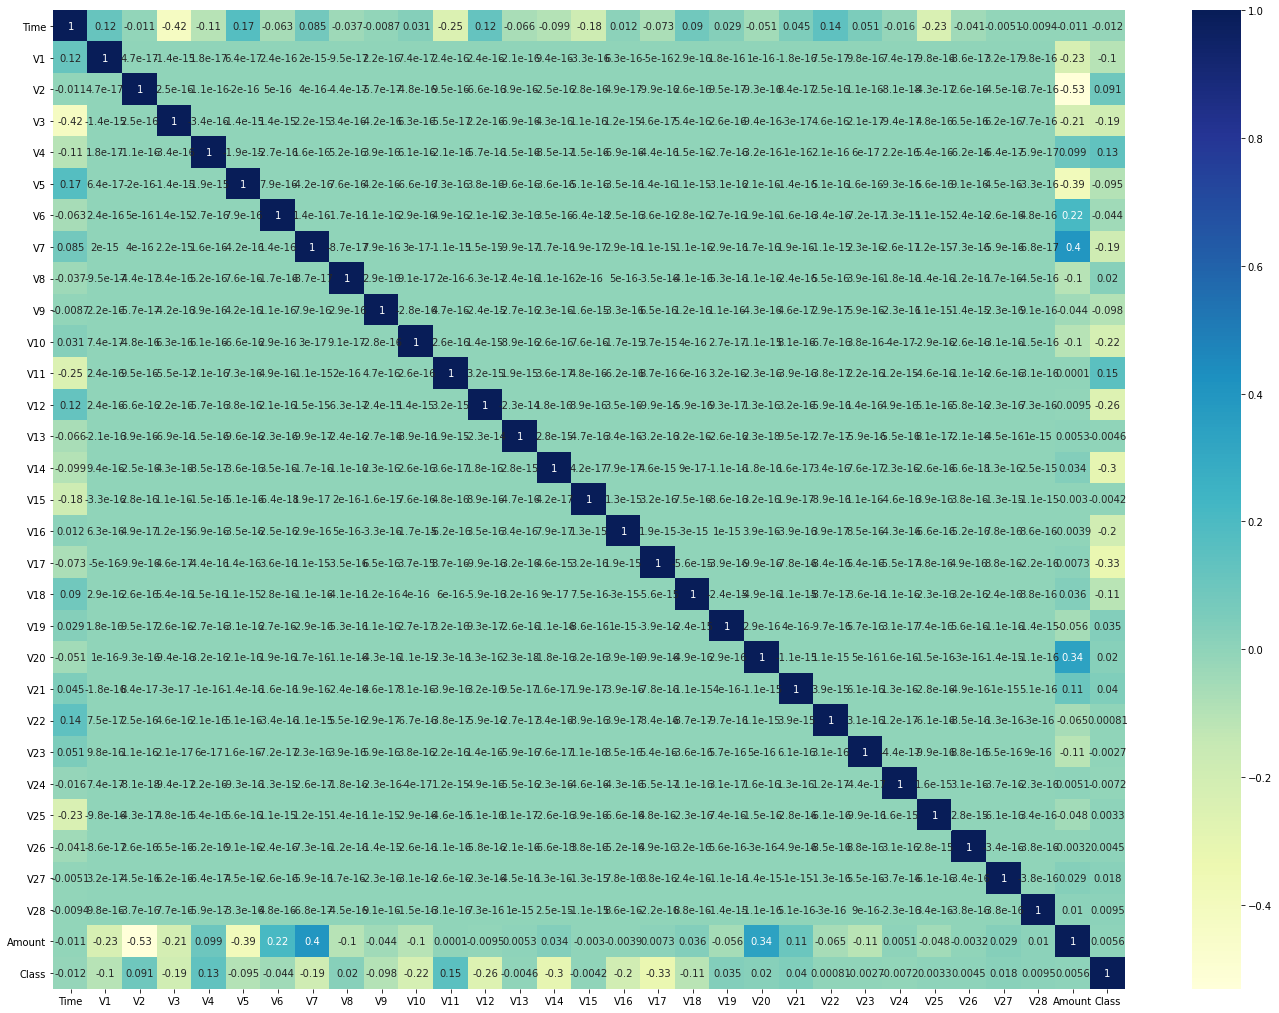

In [ ]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

**We do not see any high correlation present in the dataset**

### Observe the distribution of our classes

---



In [ ]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
normal_share, fraud_share

(99.83, 0.17)

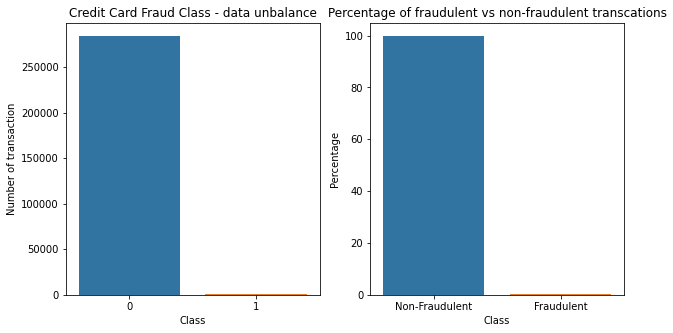

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()


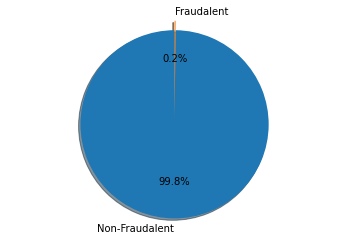

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100


labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
print('The percentage without churn prediction is ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('The percentage with churn prediction is ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df['Class'].value_counts()[1]/df['Class'].value_counts()[0] * 100,2))

The percentage without churn prediction is  99.83 % of the dataset
The percentage with churn prediction is  0.17 % of the dataset
The ratio of imbalance is 0.17


#### Observation


**So we have 492 fraudalent transactions out of 284807 total credit card transactions.**

Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions class as compared to the fraudalent transactions. The model would achieve high accuracy as it would mostly predict majority class — transactions which are genuine in our example. To overcome this we will use other metrics for model evaluation such as ROC-AUC , precision and recall etc



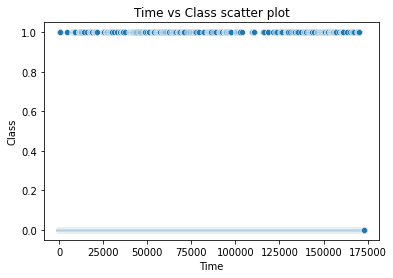

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(df["Time"], df["Class"])
plt.title("Time vs Class scatter plot")
plt.show()

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
#As time is given in relative fashion, we will need to use pandas.Timedelta which Represents a duration, the difference between two dates or times.

Delta_Time = pd.to_timedelta(df['Time'], unit='s')
#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

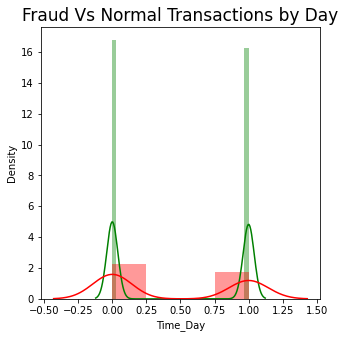

In [ ]:
#The fraus Vs normal trasaction by day
plt.figure(figsize=(5,5))
sns.distplot(df[df['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

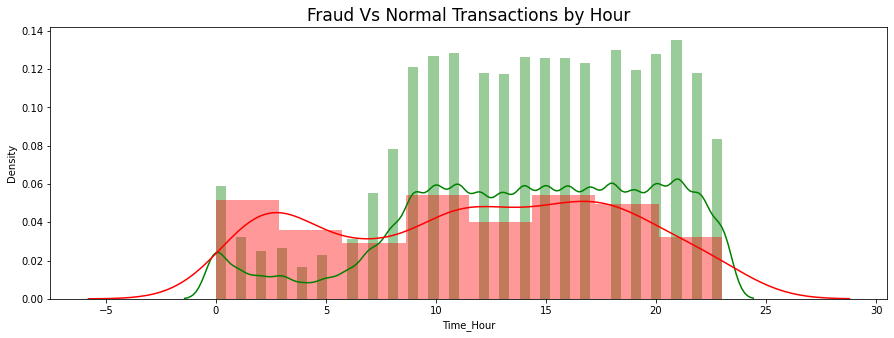

In [ ]:
#The fraus Vs normal trasaction by hour
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

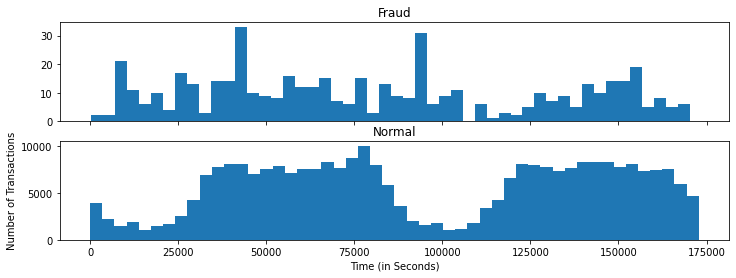

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

#### Observation

There is not much insight can be drwan from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time

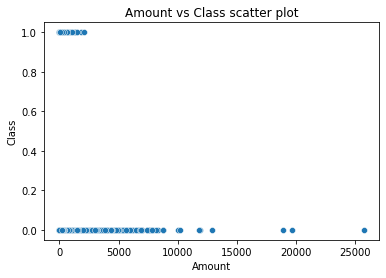

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount

sns.scatterplot(df["Amount"], df["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

#### Observation

Clearly low amount transactions are more likely to be fraudulent than high amount transaction.

Dropping Time column as this feature is not going to help in the model building.


In [ ]:
# Drop unnecessary columns
df = df.drop("Time", axis = 1)
#also day/minutes might not be very useful as this is not time series data, 
df.drop(['Time_Day', 'Time_Min' ,'Time_Hour'], axis = 1, inplace= True)

#### Plotting the distribution of all features


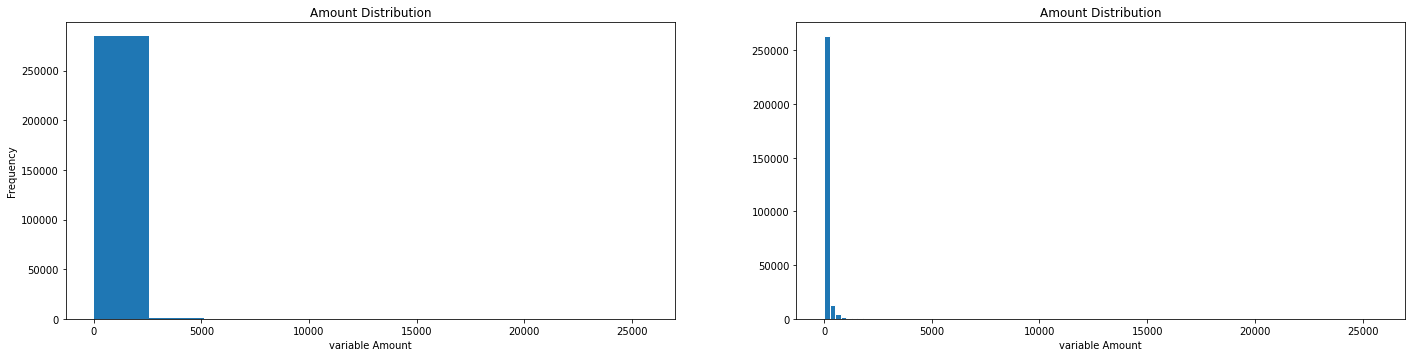

In [ ]:
# Let's try to understand the Amount variable as it is not PCA transformed variable :

plt.figure(figsize=(24, 12))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df['Amount'].astype(int).plot.hist();
plt.xlabel("variable Amount")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df['Amount'],bins=100)
plt.show()

<Figure size 432x288 with 0 Axes>

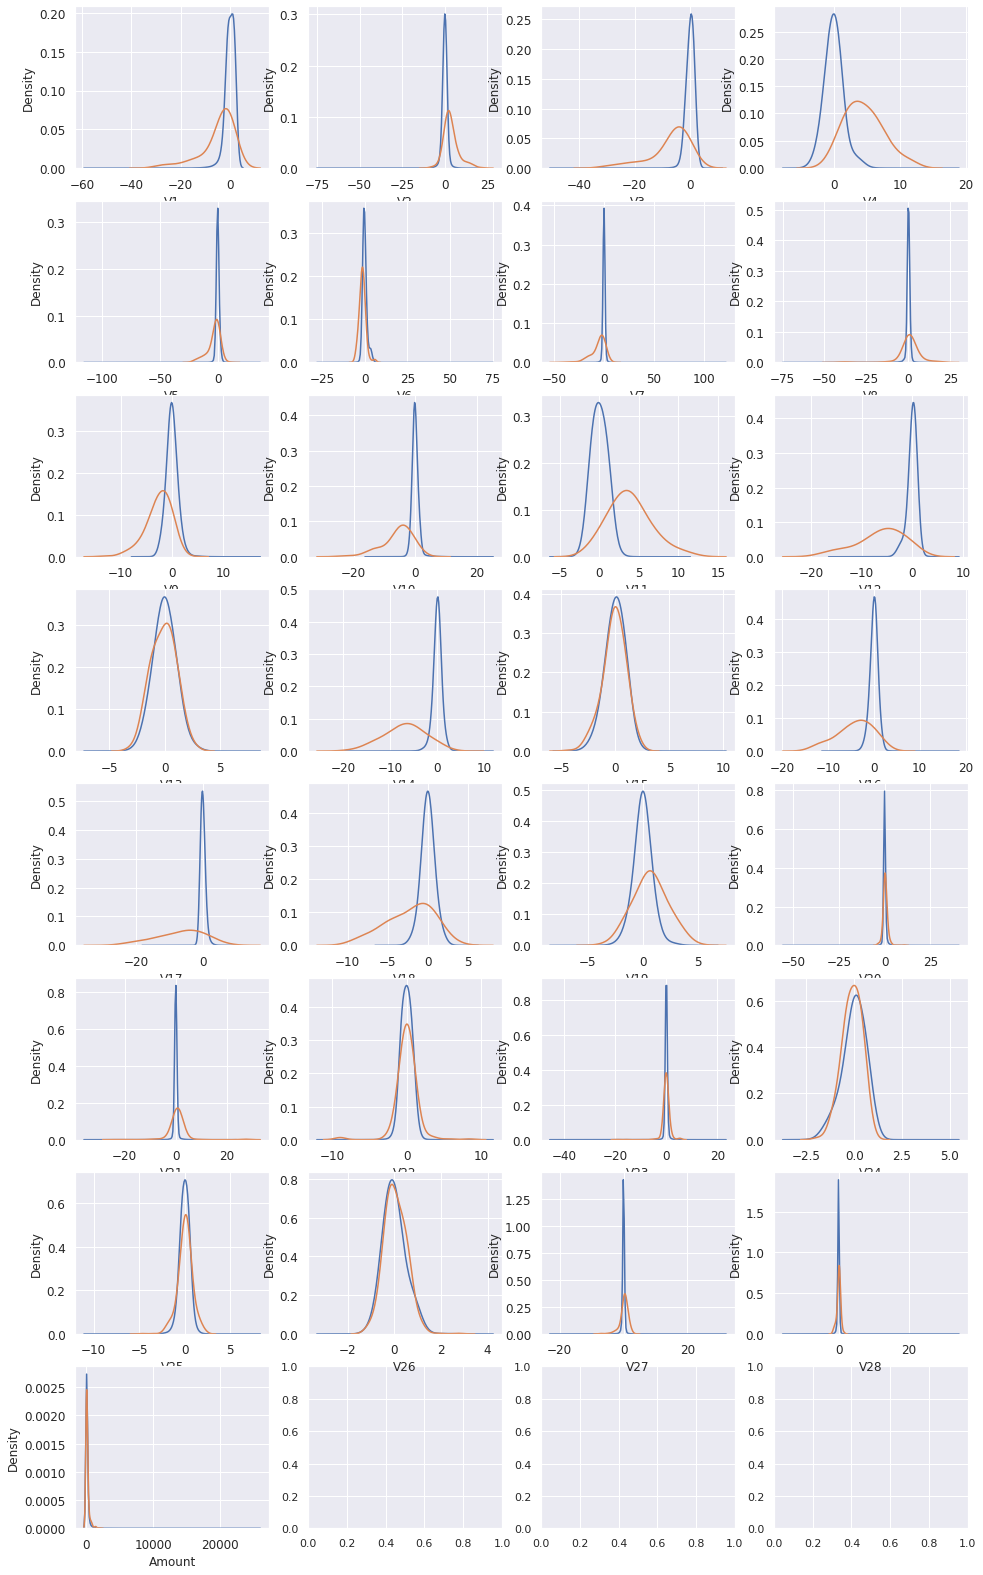

In [ ]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

#### Observation

We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions.

### Splitting the data into train & test data

In [ ]:
y= df["Class"]
X = df.drop("Class", axis = 1)

In [ ]:
cols = list(X.columns.values)
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [ ]:
# Spltting the into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
# Checking the split of the class lable
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


#### Feature Scaling using Standard Scaler

We need to scale **Amount** column.

In [ ]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = StandardScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [ ]:
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
223361  1.955041 -0.380783 -0.315013  0.330155 -0.509374 -0.086197 -0.627978   
165061 -0.400975 -0.626943  1.555339 -2.017772 -0.107769  0.168310  0.017959   
238186  0.072509  0.820566 -0.561351 -0.709897  1.080399 -0.359429  0.787858   
150562 -0.535045  1.014587  1.750679  2.769390  0.500089  1.002270  0.847902   
138452 -4.026938  1.897371 -0.429786 -0.029571 -0.855751 -0.480406 -0.435632   

              V8        V9       V10       V11       V12       V13       V14  \
223361  0.035994  1.054560 -0.030441  0.624996  1.691496  1.255790 -0.253266   
165061 -0.401619  0.040378  0.611115 -1.945070 -0.726597  1.060888 -1.193347   
238186  0.117276 -0.131275 -0.638222  0.521931 -0.072768 -1.008237 -0.640249   
150562 -0.081323  0.371579  0.560595 -0.855437 -4.179628  0.286872  1.271254   
138452  1.313760  0.536044  1.221746  0.472626  1.595929  0.777603  0.187685   

             V15       V16       V17       V18       V19       V20       V21  \
223361 -0.331695  0.307252 -0.930844  0.651666  0.167987 -0.125390  0.238197   
165061  0.631053 -0.160123 -1.630444  2.106866 -1.692780 -0.470372 -0.153485   
238186 -0.801946  0.678131  0.044374  0.521919  0.198772  0.012227 -0.314638   
150562 -1.011647  1.458600 -0.613260  0.814931 -2.147124 -0.253757  0.063525   
138452 -1.060579  0.143332  0.007803 -0.055817  0.712695 -0.012320 -0.480691   

             V22       V23       V24       V25       V26       V27       V28  \
223361  0.968305  0.053208 -0.278602 -0.044999 -0.216780  0.045168 -0.047145   
165061  0.421703  0.113442 -1.004095 -1.176695  0.361924 -0.370469 -0.144792   
238186 -0.872959  0.083391  0.148178 -0.431459  0.119690  0.206395  0.070288   
150562  0.443431 -0.072754  0.448192 -0.655203 -0.181038 -0.093013 -0.064931   
138452 -0.230369  0.250717  0.066399  0.470787  0.245335  0.286904 -0.322672   

          Amount  
223361 -0.307889  
165061 -0.167026  
238186 -0.300043  
150562  0.113600  
138452 -0.246029

In [ ]:
X_test.head()

V1        V2         V3        V4         V5        V6  \
43428  -16.526507  8.584972 -18.649853  9.505594 -13.793819 -2.832404   
49906    0.339812 -2.743745  -0.134070 -1.385729  -1.451413  1.015887   
29474    1.399590 -0.590701   0.168619 -1.029950  -0.539806  0.040444   
276481  -0.432071  1.647895  -1.669361 -0.349504   0.785785 -0.630647   
278846   2.014160 -0.137394  -1.015839  0.327269  -0.182179 -0.956571   

               V7        V8        V9        V10       V11        V12  \
43428  -16.701694  7.517344 -8.507059 -14.110184  5.299236 -10.834006   
49906   -0.524379  0.224060  0.899746  -0.565012 -0.087670   0.979427   
29474   -0.712567  0.002299 -0.971747   0.756801  0.543827   0.112453   
276481   0.276990  0.586025 -0.484715  -1.376648 -1.328335   0.223621   
278846   0.043241 -0.160746  0.363241   0.259452  0.942162   0.850038   

             V13       V14       V15       V16        V17       V18       V19  \
43428   1.671120 -9.373859  0.360806 -9.899247 -19.236292 -8.398552  3.101735   
49906   0.076883 -0.217884 -0.136830 -2.142892   0.126956  1.752662  0.432546   
29474   1.075384 -0.245772  0.180483  1.769860  -0.533172 -0.533300  1.192245   
276481  1.132627 -0.550875  0.616568  0.497974   0.502195  0.981343  0.101264   
278846 -0.616166  0.592634 -0.603845  0.091077  -0.471867 -0.333816  0.404711   

             V20       V21       V22       V23       V24       V25       V26  \
43428  -1.514923  1.190739 -1.127670 -2.358579  0.673461 -1.413700 -0.462762   
49906   0.506044 -0.213436 -0.942525 -0.526819 -1.156992  0.311211 -0.746647   
29474   0.212877  0.102398  0.168269 -0.166639 -0.810250  0.505083 -0.232340   
276481 -0.244633  0.358932  0.873663 -0.178642 -0.017171 -0.207392 -0.157756   
278846 -0.255293 -0.238644 -0.616400  0.347045  0.061561 -0.360196  0.174730   

             V27       V28    Amount  
43428  -2.018575 -1.042804  1.081514  
49906   0.040996  0.102038  1.693173  
29474   0.011409  0.004634 -0.225474  
276481 -0.237386  0.001934 -0.341192  
278846 -0.078043 -0.070571 -0.343585

### Plotting the distribution of a variable

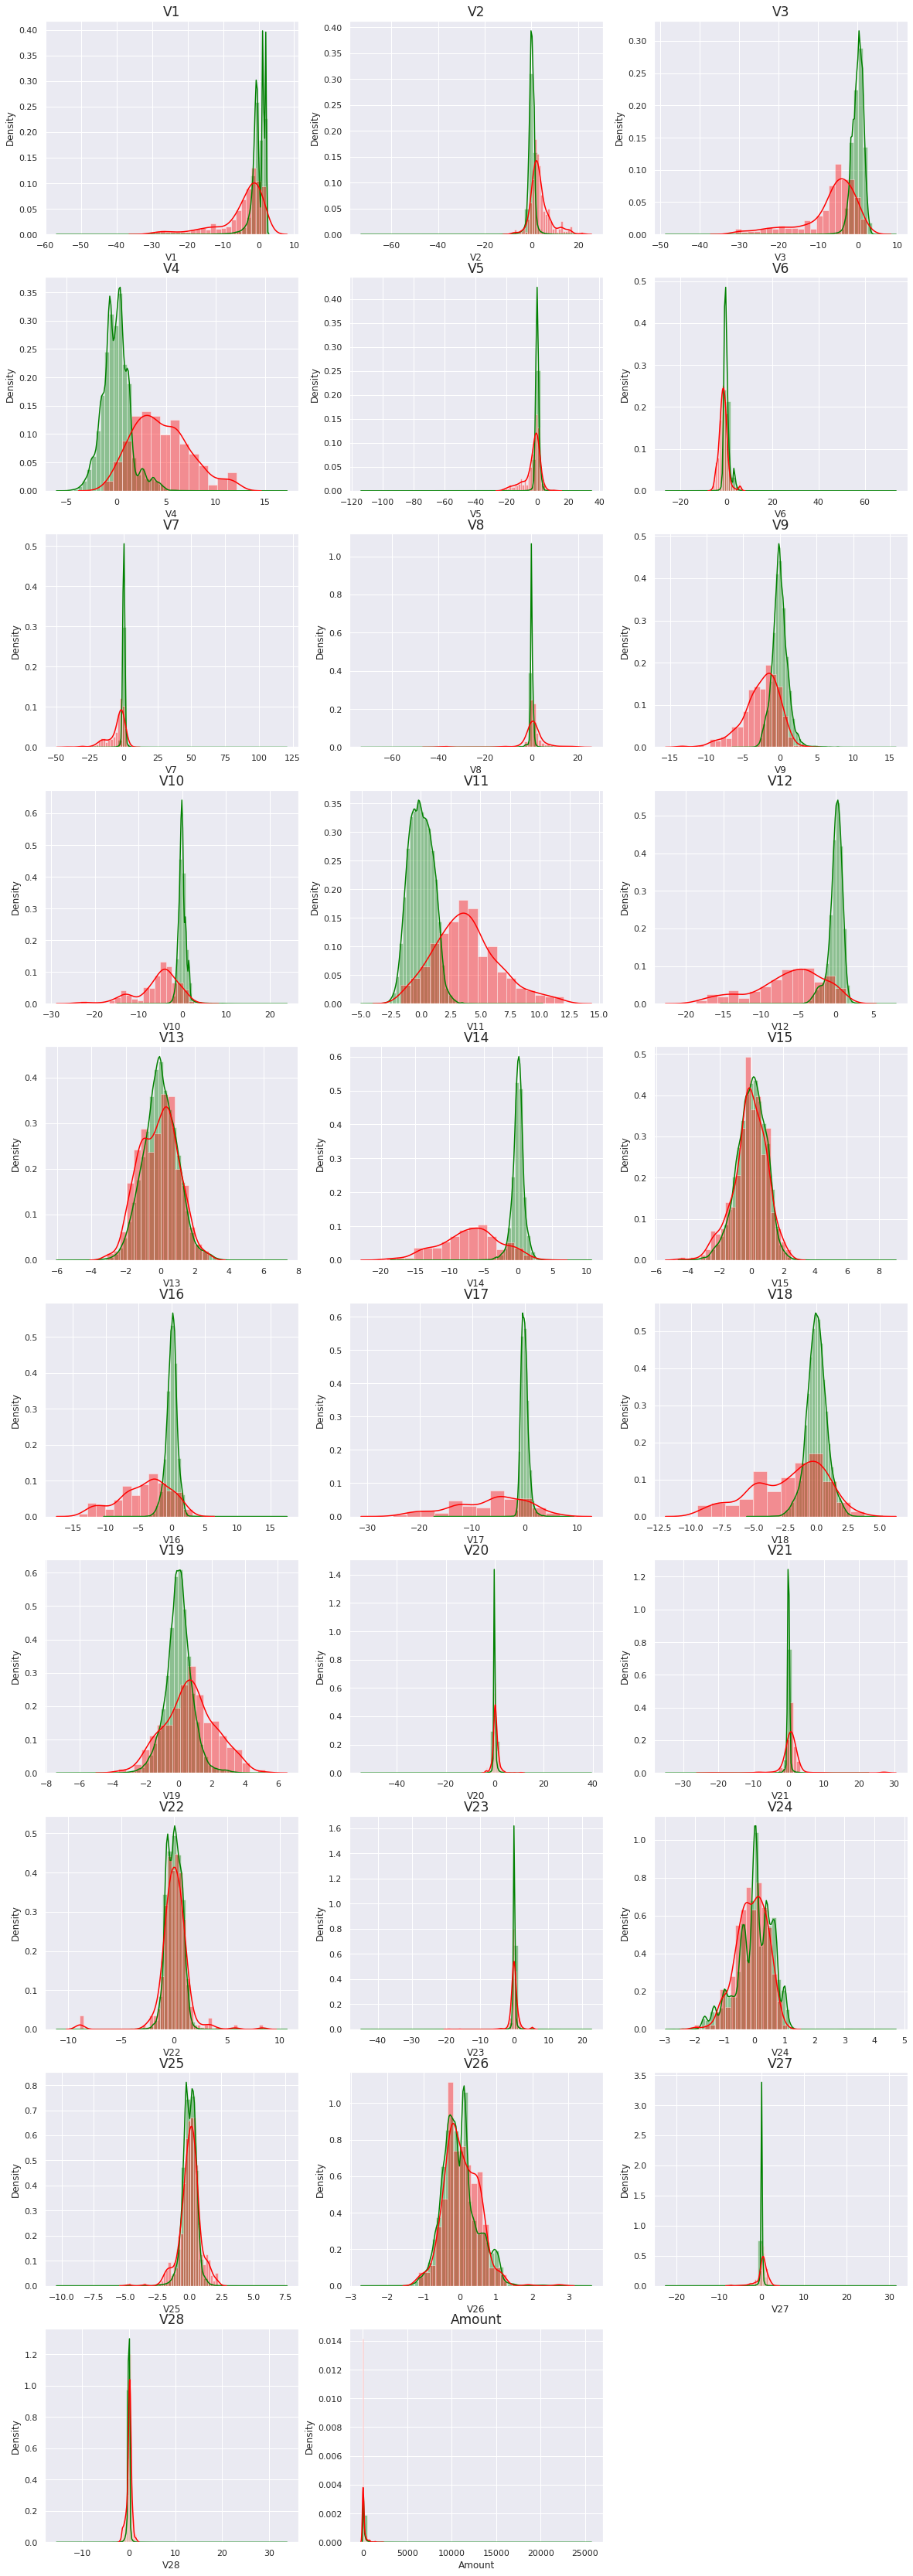

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()



Lot of features are highly skewed. So we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

In [ ]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features        V1        V2        V3        V4        V5        V6       V7  \
Skewness -3.320269 -4.826847 -2.219375  0.677776 -2.928646  1.977725  3.74462   

Features        V8        V9       V10       V11       V12       V13  \
Skewness -8.445014  0.543603  1.212102  0.359527 -2.281334  0.067612   

Features       V14       V15       V16       V17       V18       V19  \
Skewness -1.992812 -0.308053 -1.113875 -3.975821 -0.266115  0.107289   

Features       V20       V21       V22       V23       V24       V25  \
Skewness -1.977859  3.656863 -0.230008 -6.285467 -0.552668 -0.417168   

Features       V26      V27        V28     Amount  
Skewness  0.579265 -0.03833  11.776522  18.352356

In [ ]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [ ]:
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

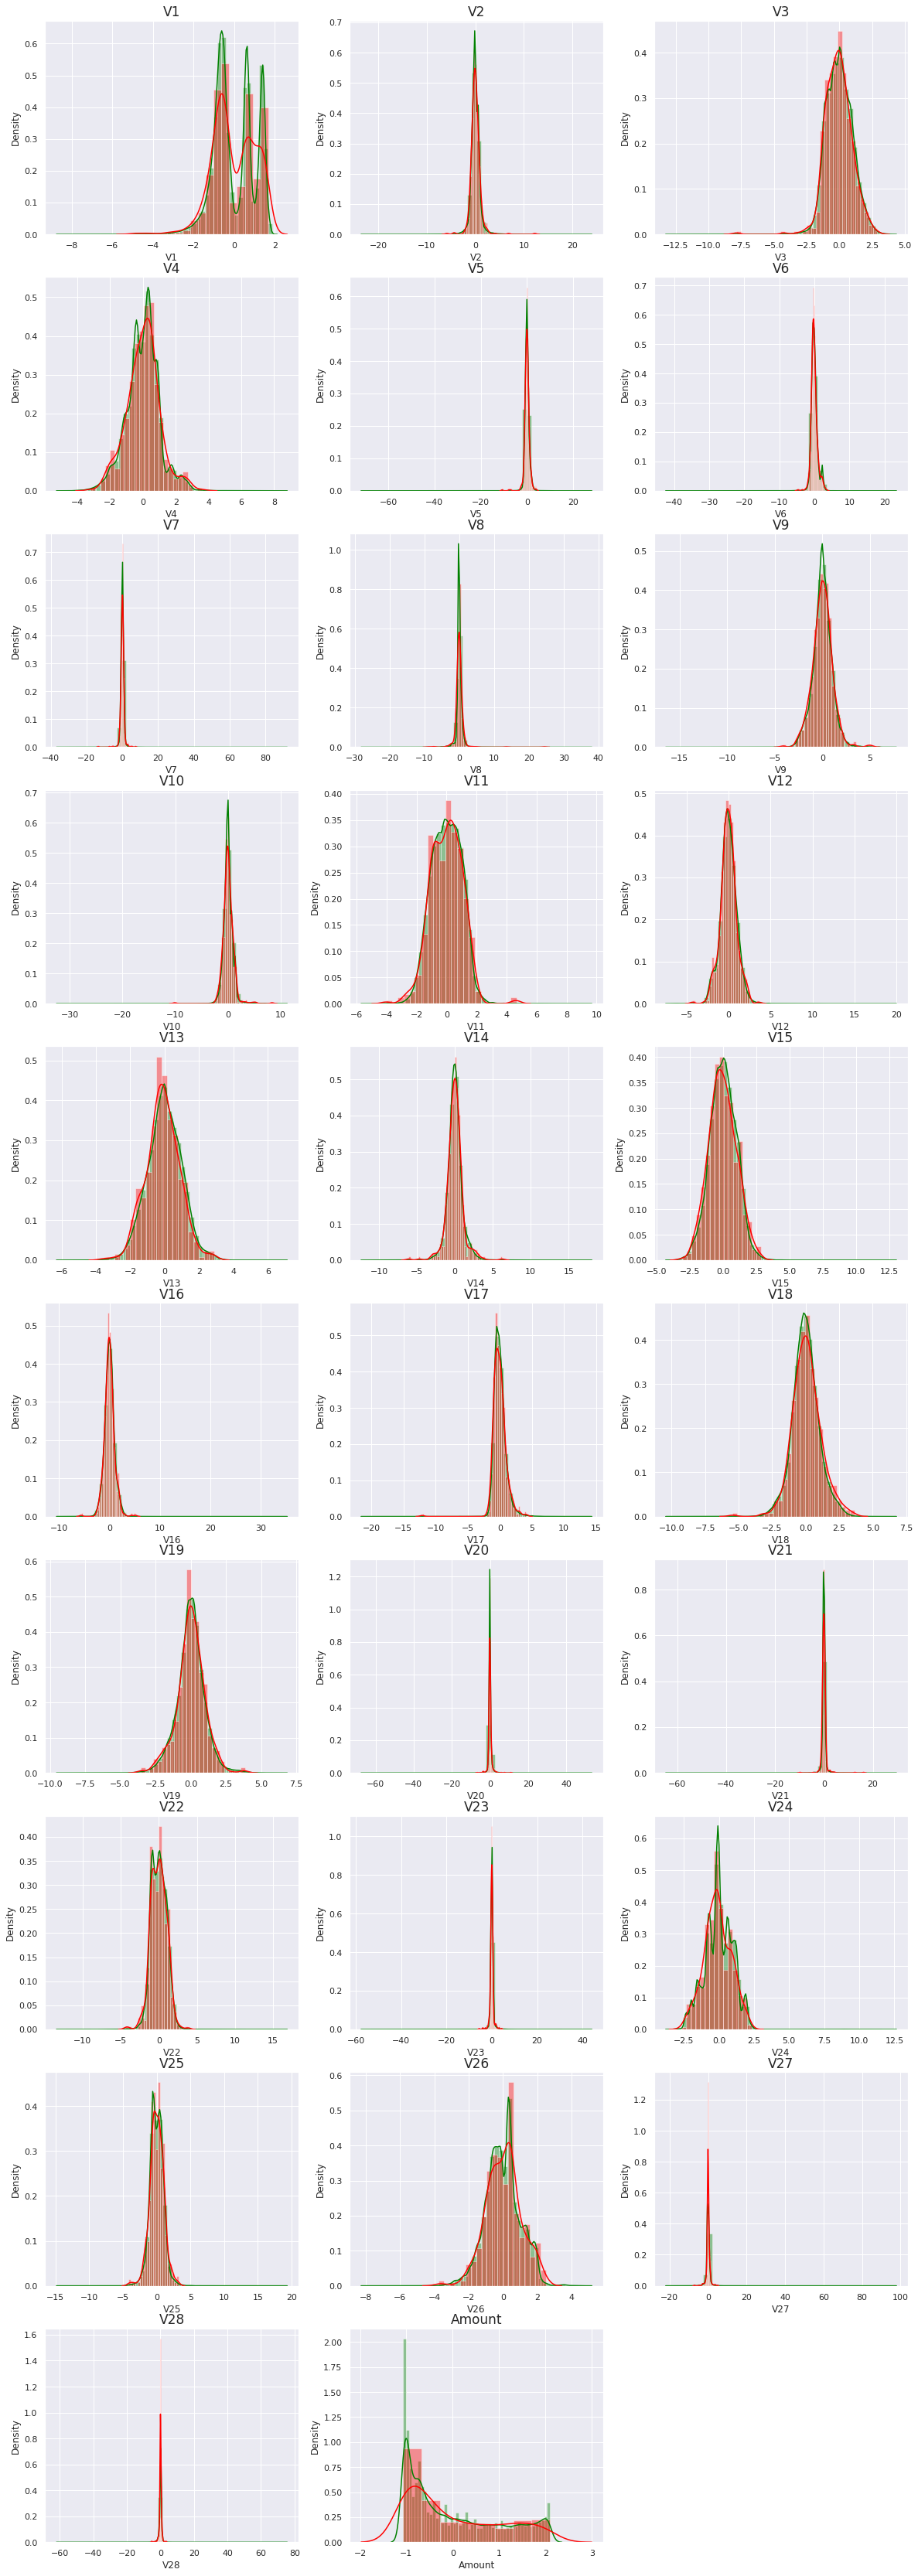

In [ ]:
 # plot the histogram of a variable from the train dataset again to see the result 

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][normal_records], color='green')
  sns.distplot(X_train_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

## Create model functions for Logistic Regress, KNN, SVM, Decision Tree, Random Forest, XGBoost

In [ ]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

In [ ]:
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [ ]:
def buildAndRunLogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model #import the package
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  #searchCV.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_) 

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_) 


  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

In [ ]:
def buildAndRunKNNModels(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate KNN  model
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [ ]:
def buildAndRunSVMModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))



  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results



In [ ]:
def buildAndRunTreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [ ]:
def buildAndRunRandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [ ]:
def buildAndRunXGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  from xgboost import XGBClassifier
  from sklearn.metrics import roc_auc_score
  # fit model no training data
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

## Model Building
- Build different models on the imbalanced dataset and see the result

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9794879964859963
Max auc_roc for l1: 0.9814027321094484
Parameters for l2 regularisations
[[-0.11439532 -0.0475338  -0.24358891  0.56006694  0.0498076   0.02517759
  -0.11961376 -0.21469041 -0.1519394  -0.19027838  0.16358934 -0.47192041
  -0.08815885 -0.65959294 -0.06673432 -0.2008596  -0.03434218  0.037968
  -0.0633958  -0.03682486  0.11479535  0.14027234 -0.08170062 -0.00945188
  -0.00769197  0.0047052  -0.08016455 -0.05007484  0.06627779]]
[-8.04118424]
{1: array([[0.92408917, 0.92402763, 0.92402763, 0.92402763, 0.92402889,
        0.92451994, 0.98055636, 0.99465495, 0.99672339, 0.99723454,
        0.99723454, 0.99715667, 0.99715667, 0.99715667, 0.99715667,
        0.99715667, 0.99715667, 0.99715667, 0.99715667, 0.99715667],
       [0.83724338, 0.83724338, 0.83724338, 0.83724338, 0.83724489,
        0.83754341, 0.91418254, 0.95569338, 0.9605106 , 0.95889375,
        0.95889375, 0.95889375, 0.95889375, 0.9588937

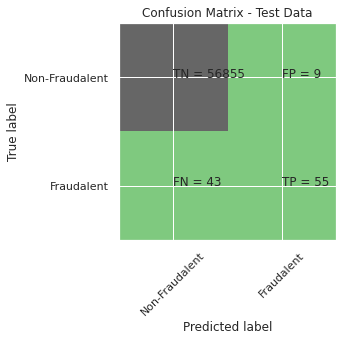

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.56      0.68        98

    accuracy                           1.00     56962
   macro avg       0.93      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9991222218320986
Confusion Matrix


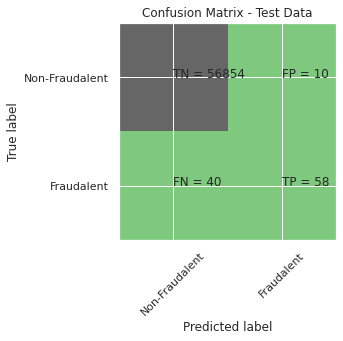

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.59      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9808269713343976
l2 threshold: 0.0031157096652907053
ROC for the test dataset 98.1%


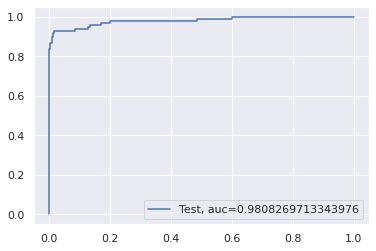

l1 roc_value: 0.9803652538674446
l1 threshold: 0.00952105663595141
ROC for the test dataset 98.0%


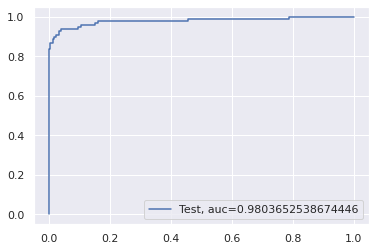

Time Taken by Model: --- 148.7926573753357 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9995435553526912
Confusion Matrix


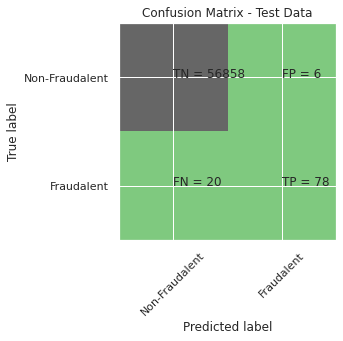

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.80      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.9386542936673824
KNN threshold: 0.2
ROC for the test dataset 93.9%


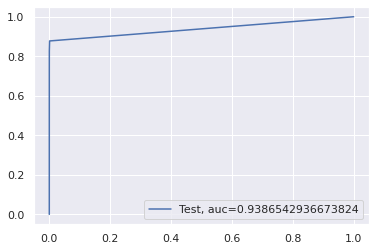

Time Taken by Model: --- 1174.5243916511536 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9990695551420246
Confusion Matrix


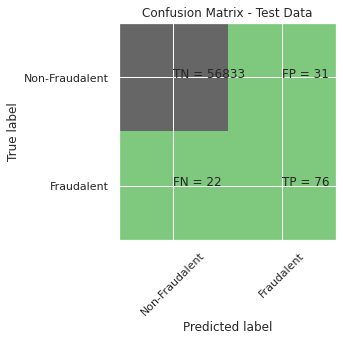

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.78      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.89      0.87     56962
weighted avg       1.00      1.00      1.00     56962

gini tree_roc_value: 0.8874825218494826
Tree threshold: 1.0
ROC for the test dataset 88.7%


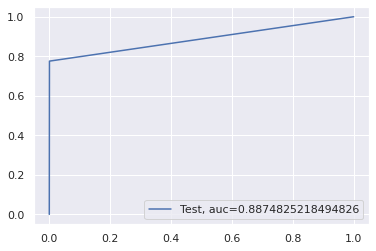

entropy score: 0.9992099996488887
Confusion Matrix


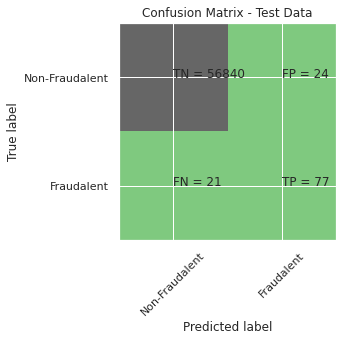

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.79      0.77        98

    accuracy                           1.00     56962
   macro avg       0.88      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962

entropy tree_roc_value: 0.8926461130315941
Tree threshold: 1.0
ROC for the test dataset 89.3%


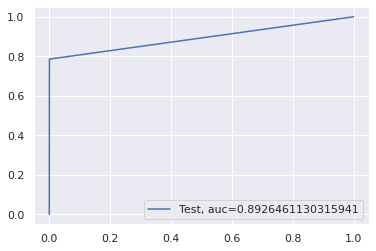

Time Taken by Model: --- 37.57887101173401 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995786664794073
Confusion Matrix


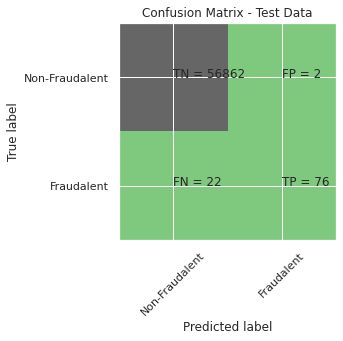

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.9526079230932666
Random Forest threshold: 0.01
ROC for the test dataset 95.3%


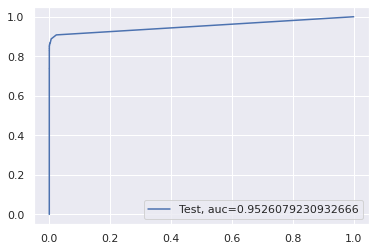

Time Taken by Model: --- 263.3359146118164 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9995786664794073
Confusion Matrix


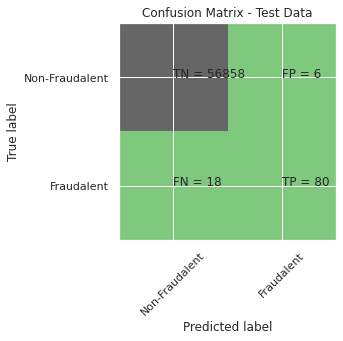

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

XGboost roc_value: 0.9747159890264491
XGBoost threshold: 0.0015827685128897429
ROC for the test dataset 97.5%


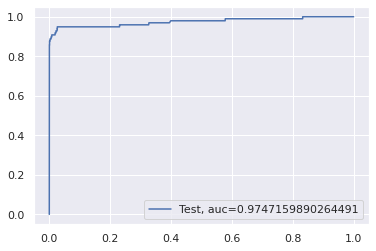

Time Taken by Model: --- 53.24832534790039 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9987711105649381
Confusion Matrix


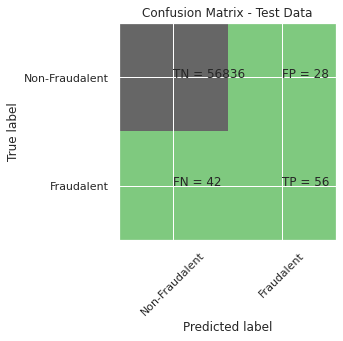

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.67      0.57      0.62        98

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value: 0.8535519406130488
SVM threshold: 0.00043660332015400116
ROC for the test dataset 85.4%


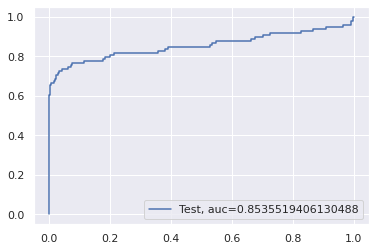

Time Taken by Model: --- 100.90211868286133 seconds ---


In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results.head()

Data_Imbalance_Handiling                                       Model  \
0        Power Transformer  Logistic Regression with L2 Regularisation   
1        Power Transformer  Logistic Regression with L1 Regularisation   
2        Power Transformer                                         KNN   
3        Power Transformer               Tree Model with gini criteria   
4        Power Transformer            Tree Model with entropy criteria   

   Accuracy  roc_value  threshold  
0  0.999087   0.980827   0.003116  
1  0.999122   0.980365   0.009521  
2  0.999544   0.938654   0.200000  
3  0.999070   0.887483   1.000000  
4  0.999210   0.892646   1.000000

## Perform cross validation with RepeatedKFold

In [ ]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     6     17     23 ... 284795 284798 284799]
TRAIN: [     0      3      4 ... 284800 284803 284806] TEST: [     1      2      5 ... 284802 284804 284805]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    13     16     18 ... 284790 284791 284794]
TRAIN: [     0      1      2 ... 284803 284804 284805] TEST: [     3      7      8 ... 284792 284797 284806]
TRAIN: [     1      2      3 ... 284804 284805 284806] TEST: [     0      4     10 ... 284796 284800 284803]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    11     15     17 ... 284786 284788 284801]
TRAIN: [     0      3      4 ... 284803 284804 284806] TEST: [     1      2      9 ... 284793 284795 284805]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3     10     13 ... 284799 284800 284803]
TRAIN: [     1      2      3 ... 284803 284804 284805] TEST: [     0      5      6 ... 284798 284802 284806]
TRAIN: [     0     

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.979874443712804
Max auc_roc for l1: 0.9773292638064394
Parameters for l2 regularisations
[[ 1.00058260e-03  5.08273540e-02 -7.95829636e-02  2.36933276e-01
   8.95799911e-02 -4.60840340e-02 -2.54497924e-02 -1.17899574e-01
  -8.33021767e-02 -1.64338406e-01  1.26454968e-01 -1.97334666e-01
  -3.79920894e-02 -3.71769558e-01 -1.33802839e-02 -9.54066181e-02
  -7.86071736e-02 -9.15486403e-04  6.45477309e-03 -1.43758205e-02
   4.43500439e-02  2.84783048e-02 -1.38872122e-02 -1.19124173e-02
  -1.07328471e-02  4.66110123e-03 -1.00482563e-02  2.89019551e-04
   3.15289662e-04]]
[-7.40301241]
{1: array([[0.61073585, 0.61194469, 0.62651422, 0.74067038, 0.891116  ,
        0.95416202, 0.97886446, 0.98310075, 0.98130949, 0.97205902,
        0.97205902, 0.97205902, 0.97205902, 0.97205902, 0.97205902,
        0.97205902, 0.97205902, 0.97205902, 0.97205902, 0.97205902],
       [0.57715417, 0.57860497, 0.59751165, 0.7357439 , 0.90971532

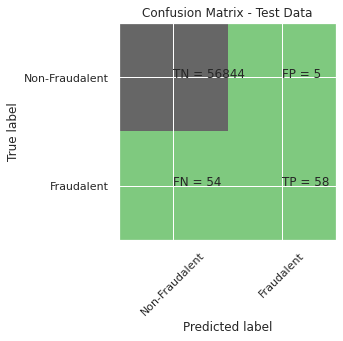

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.92      0.52      0.66       112

    accuracy                           1.00     56961
   macro avg       0.96      0.76      0.83     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9989290918347641
Confusion Matrix


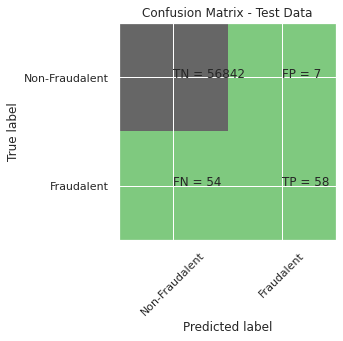

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.89      0.52      0.66       112

    accuracy                           1.00     56961
   macro avg       0.95      0.76      0.83     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9925826374631542
l2 threshold: 0.0024731109284746497
ROC for the test dataset 99.3%


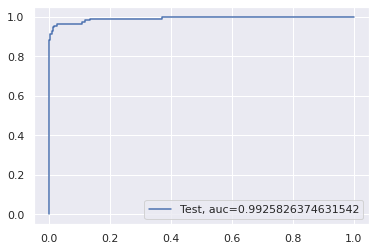

l1 roc_value: 0.9503598819428916
l1 threshold: 0.02771319254252413
ROC for the test dataset 95.0%


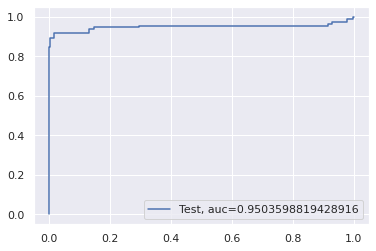

Time Taken by Model: --- 361.85105180740356 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9992099857797441
Confusion Matrix


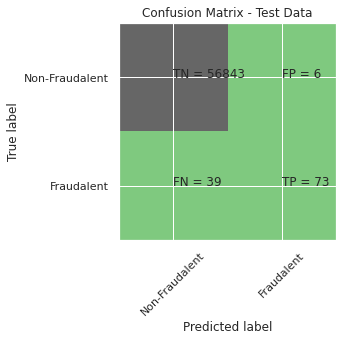

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.92      0.65      0.76       112

    accuracy                           1.00     56961
   macro avg       0.96      0.83      0.88     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.9105375173077552
KNN threshold: 0.2
ROC for the test dataset 91.1%


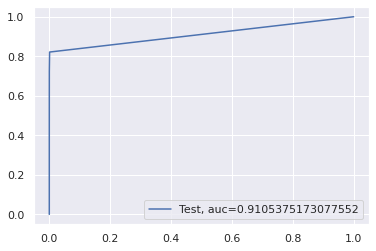

Time Taken by Model: --- 154.9204225540161 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9991924299081828
Confusion Matrix


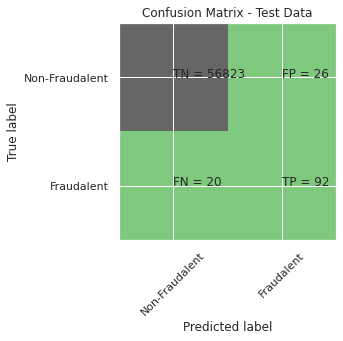

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.78      0.82      0.80       112

    accuracy                           1.00     56961
   macro avg       0.89      0.91      0.90     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.9104856097481298
Tree threshold: 1.0
ROC for the test dataset 91.0%


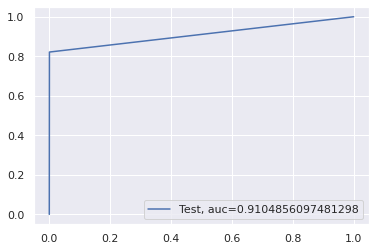

entropy score: 0.9992275416513052
Confusion Matrix


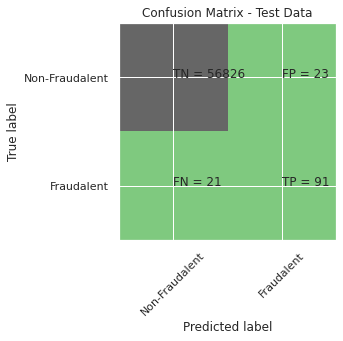

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.80      0.81      0.81       112

    accuracy                           1.00     56961
   macro avg       0.90      0.91      0.90     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.9060477097222467
Tree threshold: 1.0
ROC for the test dataset 90.6%


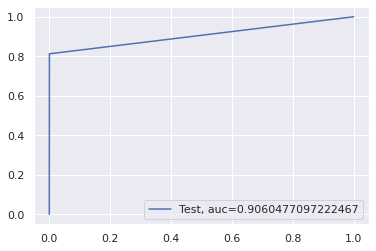

Time Taken by Model: --- 40.01632833480835 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9996313266972139
Confusion Matrix


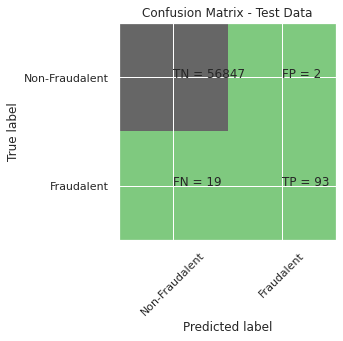

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.98      0.83      0.90       112

    accuracy                           1.00     56961
   macro avg       0.99      0.92      0.95     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9767214619933006
Random Forest threshold: 0.02
ROC for the test dataset 97.7%


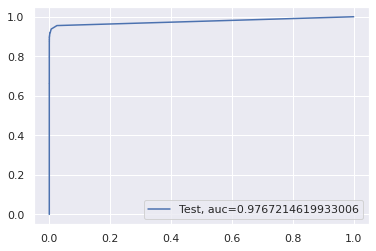

Time Taken by Model: --- 249.14216685295105 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9995786590825302
Confusion Matrix


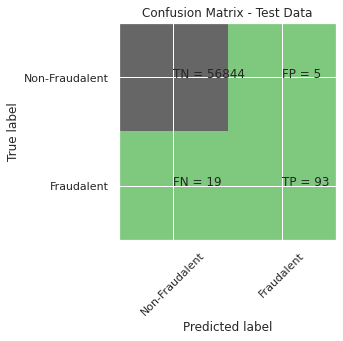

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.95      0.83      0.89       112

    accuracy                           1.00     56961
   macro avg       0.97      0.92      0.94     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9935696663843817
XGBoost threshold: 0.0018910770304501057
ROC for the test dataset 99.4%


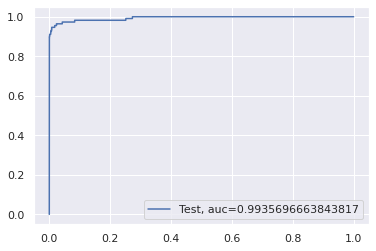

Time Taken by Model: --- 52.808228492736816 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9981917452291919
Confusion Matrix


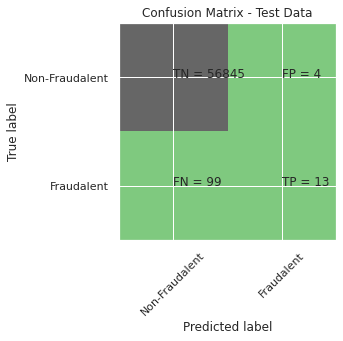

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56849
           1       0.76      0.12      0.20       112

    accuracy                           1.00     56961
   macro avg       0.88      0.56      0.60     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.4924134863535733
SVM threshold: 0.0027241064553494318
ROC for the test dataset 49.2%


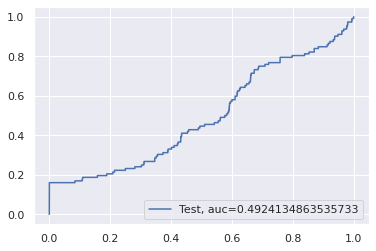

Time Taken by Model: --- 267.7844843864441 seconds ---


In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results

Data_Imbalance_Handiling  \
0                Power Transformer   
1                Power Transformer   
2                Power Transformer   
3                Power Transformer   
4                Power Transformer   
5                Power Transformer   
6                Power Transformer   
7                Power Transformer   
8   RepeatedKFold Cross Validation   
9   RepeatedKFold Cross Validation   
10  RepeatedKFold Cross Validation   
11  RepeatedKFold Cross Validation   
12  RepeatedKFold Cross Validation   
13  RepeatedKFold Cross Validation   
14  RepeatedKFold Cross Validation   
15  RepeatedKFold Cross Validation   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.999087   0.980827   0.003116  
1   Logistic Regression with L1 Regularisation  0.999122   0.980365   0.009521  
2                                          KNN  0.999544   0.938654   0.200000  
3                Tree Model with gini criteria  0.999070   0.887483   1.000000  
4             Tree Model with entropy criteria  0.999210   0.892646   1.000000  
5                                Random Forest  0.999579   0.952608   0.010000  
6                                      XGBoost  0.999579   0.974716   0.001583  
7                                          SVM  0.998771   0.853552   0.000437  
8   Logistic Regression with L2 Regularisation  0.998964   0.992583   0.002473  
9   Logistic Regression with L1 Regularisation  0.998929   0.950360   0.027713  
10                                         KNN  0.999210   0.910538   0.200000  
11               Tree Model with gini criteria  0.999192   0.910486   1.000000  
12            Tree Model with entropy criteria  0.999228   0.906048   1.000000  
13                               Random Forest  0.999631   0.976721   0.020000  
14                                     XGBoost  0.999579   0.993570   0.001891  
15                                         SVM  0.998192   0.492413   0.002724

**It seems XGBOost with Repeated KFold cross validation has provided us wih best results with ROC_Value of 0.993570**

In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']

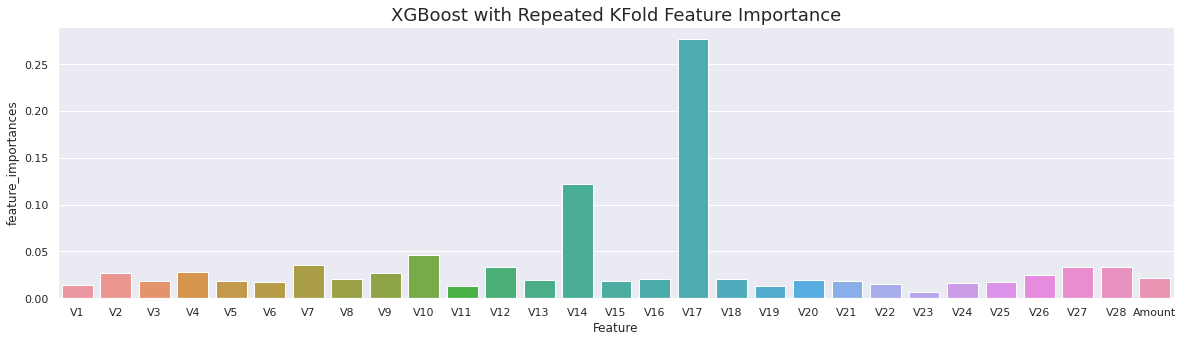

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()

## Perform cross validation with StratifiedKFold

In [ ]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9827464262647785
Max auc_roc for l1: 0.9718588688608811
Parameters for l2 regularisations
[[ 0.00692115  0.06149203 -0.06695351  0.21807091  0.05403263 -0.03199356
  -0.02289568 -0.11474936 -0.06969493 -0.16343707  0.12773481 -0.19135962
  -0.03716603 -0.36023793  0.00370854 -0.0878887  -0.07295766 -0.00083253
   0.00393926 -0.02791788  0.03801533  0.02329955 -0.01158255 -0.00997451
  -0.00650844  0.00627345 -0.01012179 -0.00169805  0.00039764]]
[-7.409016]
{1: array([[0.69891015, 0.70149274, 0.72141397, 0.84389704, 0.96686146,
        0.99058273, 0.99619093, 0.99480213, 0.99148681, 0.99107986,
        0.99107986, 0.99107986, 0.99107986, 0.99107986, 0.99107986,
        0.99107986, 0.99107986, 0.99107986, 0.99107986, 0.99107986],
       [0.60290488, 0.60403991, 0.62418428, 0.76516956, 0.91405427,
        0.95983011, 0.9748654 , 0.98203963, 0.98534462, 0.98201155,
        0.98201155, 0.98201155, 0.98201155, 0.9820115

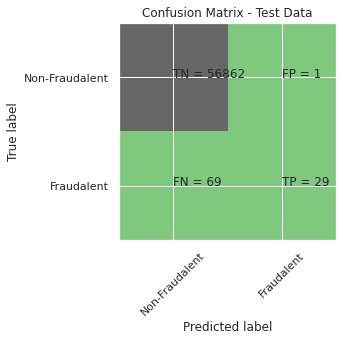

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9986481978897842
Confusion Matrix


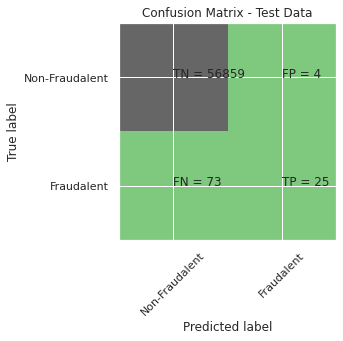

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.26      0.39        98

    accuracy                           1.00     56961
   macro avg       0.93      0.63      0.70     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9833457572748249
l2 threshold: 0.001583108105328265
ROC for the test dataset 98.3%


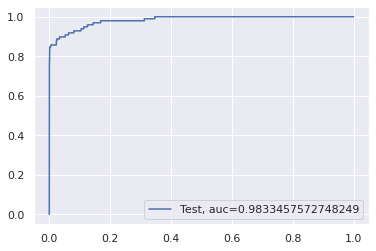

l1 roc_value: 0.9009118586850529
l1 threshold: 0.033186779619546906
ROC for the test dataset 90.1%


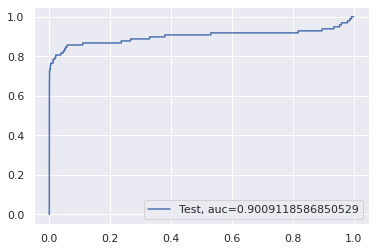

Time Taken by Model: --- 345.7049322128296 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9991222064219378
Confusion Matrix


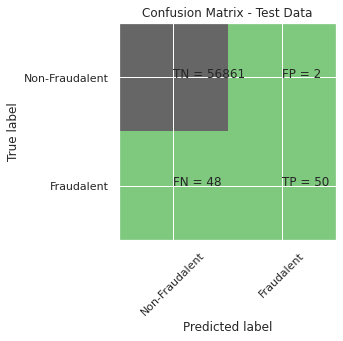

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.51      0.67        98

    accuracy                           1.00     56961
   macro avg       0.98      0.76      0.83     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8110050220957138
KNN threshold: 0.2
ROC for the test dataset 81.1%


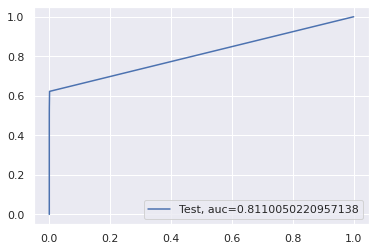

Time Taken by Model: --- 172.161194562912 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989642035778866
Confusion Matrix


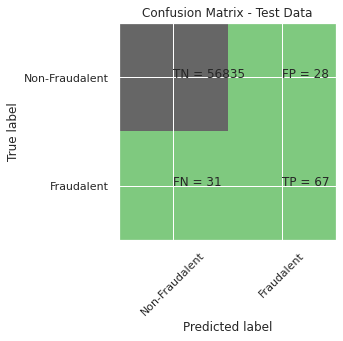

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.71      0.68      0.69        98

    accuracy                           1.00     56961
   macro avg       0.85      0.84      0.85     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8415905289010069
Tree threshold: 1.0
ROC for the test dataset 84.2%


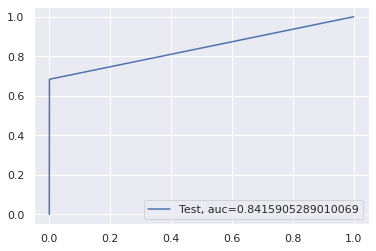

entropy score: 0.9990870946788153
Confusion Matrix


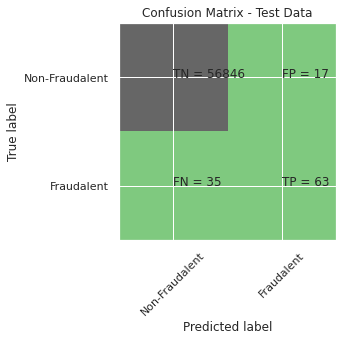

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.79      0.64      0.71        98

    accuracy                           1.00     56961
   macro avg       0.89      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212790893400429
Tree threshold: 1.0
ROC for the test dataset 82.1%


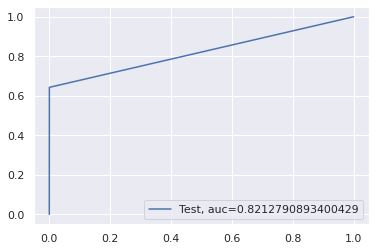

Time Taken by Model: --- 35.43973898887634 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994557679816014
Confusion Matrix


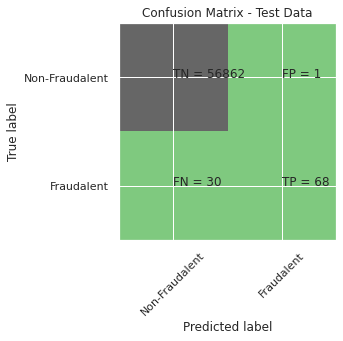

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9265156460910164
Random Forest threshold: 0.01
ROC for the test dataset 92.7%


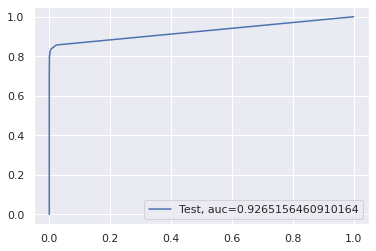

Time Taken by Model: --- 235.6550648212433 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9993855444953564
Confusion Matrix


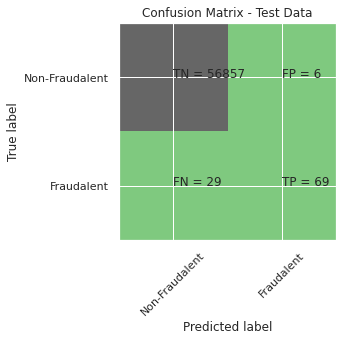

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.92      0.70      0.80        98

    accuracy                           1.00     56961
   macro avg       0.96      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9807945125538037
XGBoost threshold: 0.0014997341204434633
ROC for the test dataset 98.1%


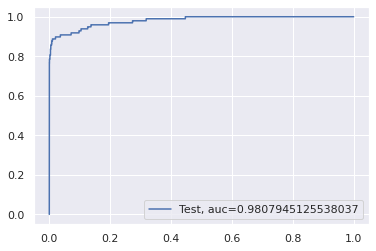

Time Taken by Model: --- 54.67609763145447 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9982795245869981
Confusion Matrix


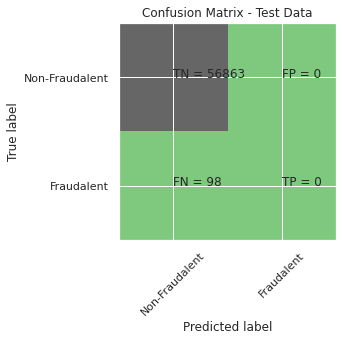

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.40214557940370105
SVM threshold: 0.002893479508671045
ROC for the test dataset 40.2%


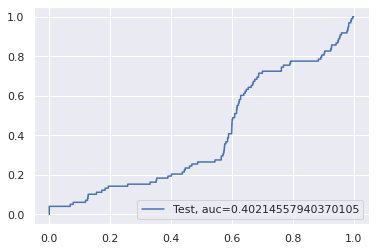

Time Taken by Model: --- 289.0880517959595 seconds ---


In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results

Data_Imbalance_Handiling  \
0                  Power Transformer   
1                  Power Transformer   
2                  Power Transformer   
3                  Power Transformer   
4                  Power Transformer   
5                  Power Transformer   
6                  Power Transformer   
7                  Power Transformer   
8     RepeatedKFold Cross Validation   
9     RepeatedKFold Cross Validation   
10    RepeatedKFold Cross Validation   
11    RepeatedKFold Cross Validation   
12    RepeatedKFold Cross Validation   
13    RepeatedKFold Cross Validation   
14    RepeatedKFold Cross Validation   
15    RepeatedKFold Cross Validation   
16  StratifiedKFold Cross Validation   
17  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
20  StratifiedKFold Cross Validation   
21  StratifiedKFold Cross Validation   
22  StratifiedKFold Cross Validation   
23  StratifiedKFold Cross Validation   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.999087   0.980827   0.003116  
1   Logistic Regression with L1 Regularisation  0.999122   0.980365   0.009521  
2                                          KNN  0.999544   0.938654   0.200000  
3                Tree Model with gini criteria  0.999070   0.887483   1.000000  
4             Tree Model with entropy criteria  0.999210   0.892646   1.000000  
5                                Random Forest  0.999579   0.952608   0.010000  
6                                      XGBoost  0.999579   0.974716   0.001583  
7                                          SVM  0.998771   0.853552   0.000437  
8   Logistic Regression with L2 Regularisation  0.998964   0.992583   0.002473  
9   Logistic Regression with L1 Regularisation  0.998929   0.950360   0.027713  
10                                         KNN  0.999210   0.910538   0.200000  
11               Tree Model with gini criteria  0.999192   0.910486   1.000000  
12            Tree Model with entropy criteria  0.999228   0.906048   1.000000  
13                               Random Forest  0.999631   0.976721   0.020000  
14                                     XGBoost  0.999579   0.993570   0.001891  
15                                         SVM  0.998192   0.492413   0.002724  
16  Logistic Regression with L2 Regularisation  0.998771   0.983346   0.001583  
17  Logistic Regression with L1 Regularisation  0.998648   0.900912   0.033187  
18                                         KNN  0.999122   0.811005   0.200000  
19               Tree Model with gini criteria  0.998964   0.841591   1.000000  
20            Tree Model with entropy criteria  0.999087   0.821279   1.000000  
21                               Random Forest  0.999456   0.926516   0.010000  
22                                     XGBoost  0.999386   0.980795   0.001500  
23                                         SVM  0.998280   0.402146   0.002893

**As the results show Logistic Regression with L2 Regularisation for StratifiedFold cross validation provided best results**

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

#searchCV.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_) 
print(searchCV_l2.scores_) 


#find predicted vallues
y_pred_l2 = searchCV_l2.predict(X_test)


#Find predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))

Max auc_roc for l2: 0.9812819004700544
Parameters for l2 regularisations
[[ 0.00431091  0.0242149  -0.0906136   0.24487645  0.07830588 -0.03762044
  -0.02351513 -0.12406593 -0.08249687 -0.17100975  0.13244152 -0.20274254
  -0.03530277 -0.37987579 -0.00699957 -0.09918133 -0.08346561 -0.00331452
   0.00622033 -0.00946901  0.04423578  0.02888679 -0.02106435 -0.01214089
  -0.01680552  0.00562557 -0.00964428 -0.00465436  0.02807083]]
[-7.42222657]
{1: array([[0.98781915, 0.98781915, 0.98781915, 0.98781915, 0.98781915,
        0.9878292 , 0.98948446, 0.99110204, 0.99167975, 0.98893187,
        0.98893187, 0.98893187, 0.98893187, 0.98893187, 0.98893187,
        0.98893187, 0.98893187, 0.98893187, 0.98893187, 0.98893187],
       [0.94846831, 0.94846831, 0.94846831, 0.94846831, 0.94846225,
        0.9484774 , 0.95437656, 0.95854523, 0.95623284, 0.94723635,
        0.93718368, 0.93718368, 0.93718368, 0.93718368, 0.93718368,
        0.93718368, 0.93718368, 0.93718368, 0.93718368, 0.93718368],
   

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
searchCV_l2.coef_

array([[ 0.00431091,  0.0242149 , -0.0906136 ,  0.24487645,  0.07830588,
        -0.03762044, -0.02351513, -0.12406593, -0.08249687, -0.17100975,
         0.13244152, -0.20274254, -0.03530277, -0.37987579, -0.00699957,
        -0.09918133, -0.08346561, -0.00331452,  0.00622033, -0.00946901,
         0.04423578,  0.02888679, -0.02106435, -0.01214089, -0.01680552,
         0.00562557, -0.00964428, -0.00465436,  0.02807083]])

In [ ]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

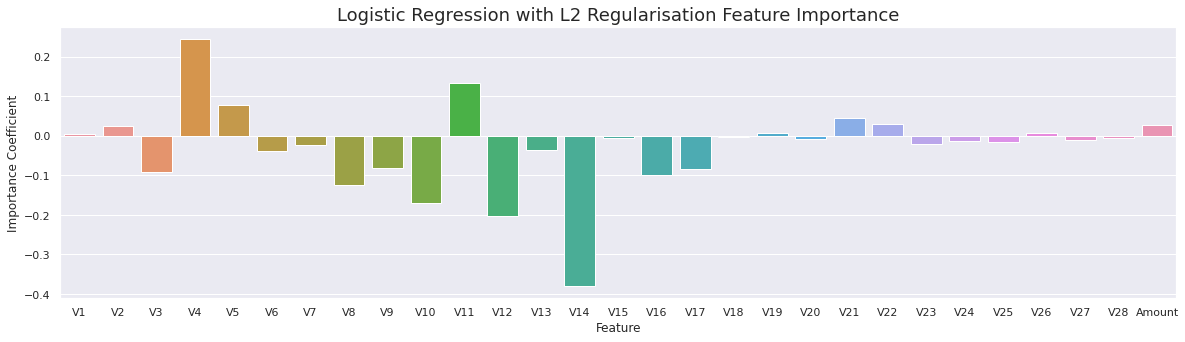

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()

**Its is evident that V4, V11, v5 has + ve imporatnce whereas V14, V12, V10 seems to have -ve impact on the predictaions**

### As the models Oversampling data, take significantly longer time to run.

We will try with undersampling methods

In [ ]:
# Undersampling

from imblearn.under_sampling import RandomUnderSampler
#Define Oversampler
RUS = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_Under, y_Under = RUS.fit_resample(X_train, y_train)
#Create Dataframe
X_Under = pd.DataFrame(data=X_Under,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9801934681002662
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[-0.05846108  0.01378027 -0.11770844  0.39337819  0.05591633 -0.07723081
  -0.04303862 -0.12148952 -0.05042209 -0.20489354  0.13629587 -0.26618598
  -0.05872778 -0.36899816 -0.04390134 -0.0927052  -0.04663107  0.01890282
  -0.03340012 -0.06540959  0.08297567  0.05051631 -0.0748116   0.00687723
   0.00888706 -0.01831134  0.02682527  0.05017749  0.08159848]]
[-2.7298803]
{1: array([[0.96185897, 0.96185897, 0.96185897, 0.96185897, 0.96185897,
        0.96153846, 0.96378205, 0.96826923, 0.96826923, 0.9724359 ,
        0.9724359 , 0.9724359 , 0.9724359 , 0.9724359 , 0.9724359 ,
        0.9724359 , 0.9724359 , 0.9724359 , 0.9724359 , 0.9724359 ],
       [0.99025341, 0.99025341, 0.99025341, 0.99025341, 0.99025341,
        0.99155296, 0.98700455, 0.98440546, 0.9811566 , 0.97693307,
        0.97595841, 0.97595841, 0.97595841, 0.97595841, 0.97595841,

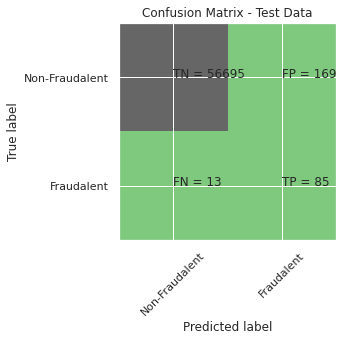

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.33      0.87      0.48        98

    accuracy                           1.00     56962
   macro avg       0.67      0.93      0.74     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9982795547909132
Confusion Matrix


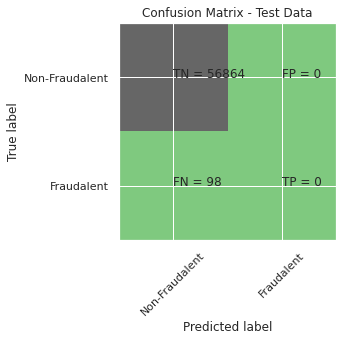

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9866394433406452
l2 threshold: 0.2080093684989132
ROC for the test dataset 98.7%


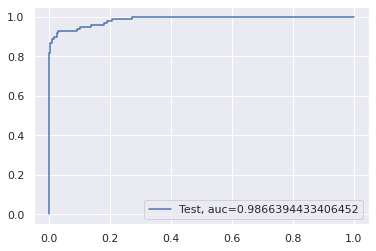

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


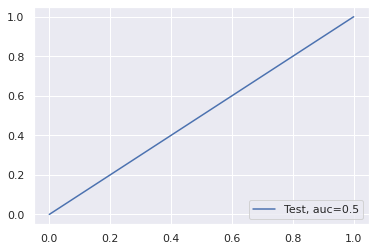

Time Taken by Model: --- 2.4612255096435547 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9880271057898248
Confusion Matrix


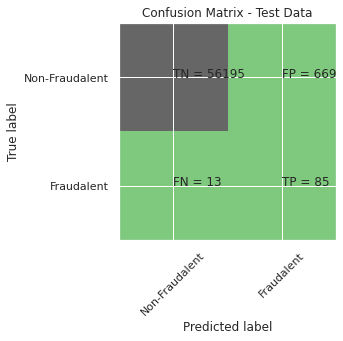

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.87      0.20        98

    accuracy                           0.99     56962
   macro avg       0.56      0.93      0.60     56962
weighted avg       1.00      0.99      0.99     56962

KNN roc_value: 0.9664720084009968
KNN threshold: 0.4
ROC for the test dataset 96.6%


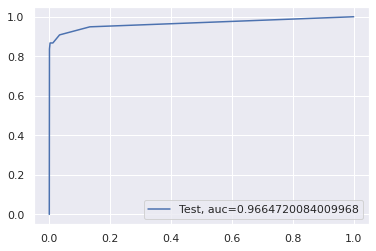

Time Taken by Model: --- 11.459921836853027 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9388188616972719
Confusion Matrix


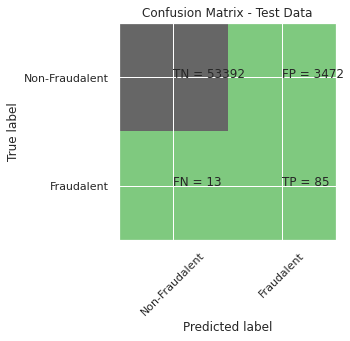

classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56864
           1       0.02      0.87      0.05        98

    accuracy                           0.94     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.94      0.97     56962

gini tree_roc_value: 0.9031444879583798
Tree threshold: 1.0
ROC for the test dataset 90.3%


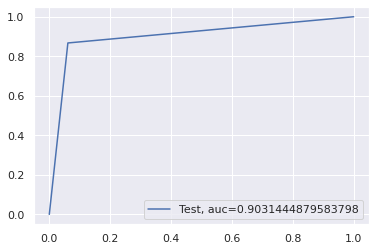

entropy score: 0.9456304202801868
Confusion Matrix


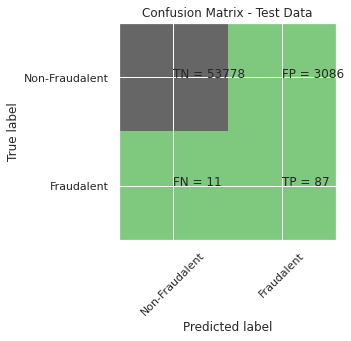

classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.89      0.05        98

    accuracy                           0.95     56962
   macro avg       0.51      0.92      0.51     56962
weighted avg       1.00      0.95      0.97     56962

entropy tree_roc_value: 0.9167426326186073
Tree threshold: 1.0
ROC for the test dataset 91.7%


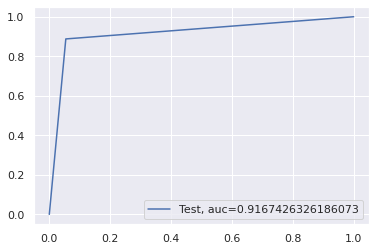

Time Taken by Model: --- 1.1874241828918457 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9932586636705172
Confusion Matrix


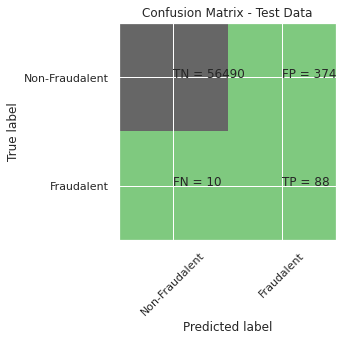

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.19      0.90      0.31        98

    accuracy                           0.99     56962
   macro avg       0.60      0.95      0.66     56962
weighted avg       1.00      0.99      1.00     56962

Random Forest roc_value: 0.9824005432223537
Random Forest threshold: 0.32
ROC for the test dataset 98.2%


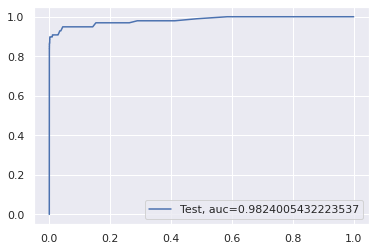

Time Taken by Model: --- 2.9955506324768066 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.985007548892244
Confusion Matrix


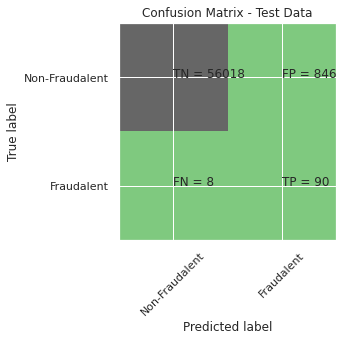

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.92      0.17        98

    accuracy                           0.99     56962
   macro avg       0.55      0.95      0.58     56962
weighted avg       1.00      0.99      0.99     56962

XGboost roc_value: 0.9837748390718133
XGBoost threshold: 0.3551509976387024
ROC for the test dataset 98.4%


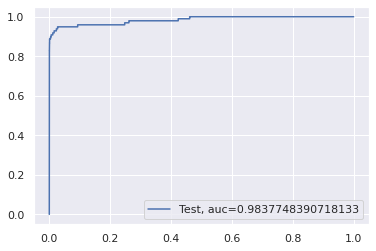

Time Taken by Model: --- 1.3760628700256348 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9333766370562832
Confusion Matrix


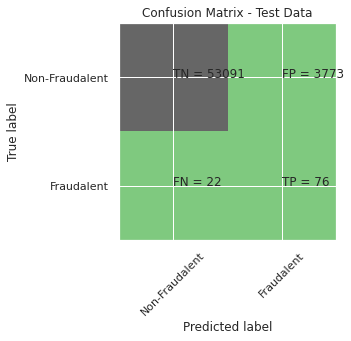

classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.97     56864
           1       0.02      0.78      0.04        98

    accuracy                           0.93     56962
   macro avg       0.51      0.85      0.50     56962
weighted avg       1.00      0.93      0.96     56962

SVM roc_value: 0.8803094816992638
SVM threshold: 0.24836668202280193
ROC for the test dataset 88.0%


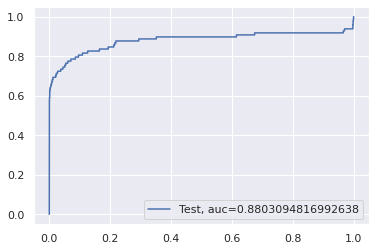

Time Taken by Model: --- 1.9210636615753174 seconds ---


In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Random Undersampling", X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_Results

Data_Imbalance_Handiling  \
0                  Power Transformer   
1                  Power Transformer   
2                  Power Transformer   
3                  Power Transformer   
4                  Power Transformer   
5                  Power Transformer   
6                  Power Transformer   
7                  Power Transformer   
8     RepeatedKFold Cross Validation   
9     RepeatedKFold Cross Validation   
10    RepeatedKFold Cross Validation   
11    RepeatedKFold Cross Validation   
12    RepeatedKFold Cross Validation   
13    RepeatedKFold Cross Validation   
14    RepeatedKFold Cross Validation   
15    RepeatedKFold Cross Validation   
16  StratifiedKFold Cross Validation   
17  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
20  StratifiedKFold Cross Validation   
21  StratifiedKFold Cross Validation   
22  StratifiedKFold Cross Validation   
23  StratifiedKFold Cross Validation   
24              Random Undersampling   
25              Random Undersampling   
26              Random Undersampling   
27              Random Undersampling   
28              Random Undersampling   
29              Random Undersampling   
30              Random Undersampling   
31              Random Undersampling   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.999087   0.980827   0.003116  
1   Logistic Regression with L1 Regularisation  0.999122   0.980365   0.009521  
2                                          KNN  0.999544   0.938654   0.200000  
3                Tree Model with gini criteria  0.999070   0.887483   1.000000  
4             Tree Model with entropy criteria  0.999210   0.892646   1.000000  
5                                Random Forest  0.999579   0.952608   0.010000  
6                                      XGBoost  0.999579   0.974716   0.001583  
7                                          SVM  0.998771   0.853552   0.000437  
8   Logistic Regression with L2 Regularisation  0.998964   0.992583   0.002473  
9   Logistic Regression with L1 Regularisation  0.998929   0.950360   0.027713  
10                                         KNN  0.999210   0.910538   0.200000  
11               Tree Model with gini criteria  0.999192   0.910486   1.000000  
12            Tree Model with entropy criteria  0.999228   0.906048   1.000000  
13                               Random Forest  0.999631   0.976721   0.020000  
14                                     XGBoost  0.999579   0.993570   0.001891  
15                                         SVM  0.998192   0.492413   0.002724  
16  Logistic Regression with L2 Regularisation  0.998771   0.983346   0.001583  
17  Logistic Regression with L1 Regularisation  0.998648   0.900912   0.033187  
18                                         KNN  0.999122   0.811005   0.200000  
19               Tree Model with gini criteria  0.998964   0.841591   1.000000  
20            Tree Model with entropy criteria  0.999087   0.821279   1.000000  
21                               Random Forest  0.999456   0.926516   0.010000  
22                                     XGBoost  0.999386   0.980795   0.001500  
23                                         SVM  0.998280   0.402146   0.002893  
24  Logistic Regression with L2 Regularisation  0.996805   0.986639   0.208009  
25  Logistic Regression with L1 Regularisation  0.998280   0.500000   1.500000  
26                                         KNN  0.988027   0.966472   0.400000  
27               Tree Model with gini criteria  0.938819   0.903144   1.000000  
28            Tree Model with entropy criteria  0.945630   0.916743   1.000000  
29                               Random Forest  0.993259   0.982401   0.320000  
30                                     XGBoost  0.985008   0.983775   0.355151  
31                                         SVM  0.933377   0.880309   0.248367



**It seems Undersampling has impoved the XGBoost Results**


## Model building with balancing Classes

Perform class balancing with :

*    Random Oversampling
*    SMOTE
*    ADASYN










## Oversampling with RandomOverSampler and StratifiedKFold Cross Validation



We will use Random Oversampling method to handle the class imbalance

1.    First we will display class distibution with and without the Random Oversampling.

2.    Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.


Once we have train and test dataset we will feed the data to below models:

1.    Logistic Regression with L2 Regularisation
2.    Logistic Regression with L1 Regularisation
3.    KNN
4.    Decision tree model with Gini criteria
5.    Decision tree model with Entropy criteria
6.    Random Forest
7.    XGBoost
8.    We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.
9.    Once we get results for above model, we will compare the results and select model which provided best results for the Random oversampling techinique



In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9859377971990396
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.36003393  0.38814707  0.29865714  0.82903816  0.31390834 -0.49397968
  -0.3408811  -0.32886415 -0.23239937 -0.65476919  0.2652569  -0.81781631
  -0.34879592 -0.91280576  0.05414431 -0.52115436 -0.28149959 -0.13853209
   0.10884562 -0.70643195  0.04818715  0.5051738   0.11960825 -0.46392462
   0.23760793 -0.09210943 -0.29005067  0.20029815  0.00543488]]
[-4.60231147]
{1: array([[0.63484262, 0.76191172, 0.91332747, 0.96446943, 0.98089616,
        0.98494985, 0.98594736, 0.98651987, 0.9868717 , 0.98698367,
        0.98698367, 0.98700275, 0.98700275, 0.98700275, 0.98700275,
        0.98700275, 0.98700275, 0.98700275, 0.98700275, 0.98700275],
       [0.63103948, 0.75797503, 0.91175756, 0.96329405, 0.97958706,
        0.98360505, 0.98456493, 0.9850122 , 0.98530101, 0.98539912,
        0.98541256, 0.98541256, 0.98541256, 0.98541256, 0.98541256

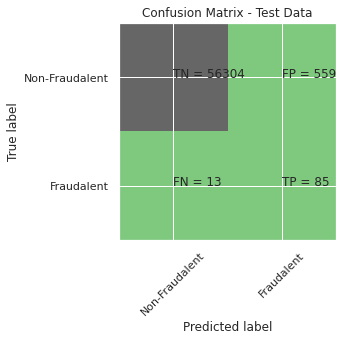

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.13      0.87      0.23        98

    accuracy                           0.99     56961
   macro avg       0.57      0.93      0.61     56961
weighted avg       1.00      0.99      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


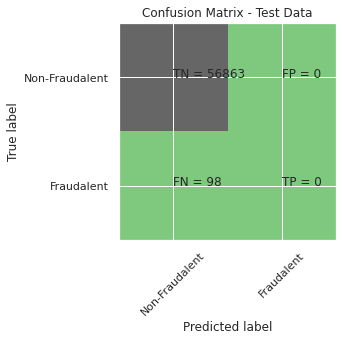

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9802832586879959
l2 threshold: 0.2607674203920896
ROC for the test dataset 98.0%


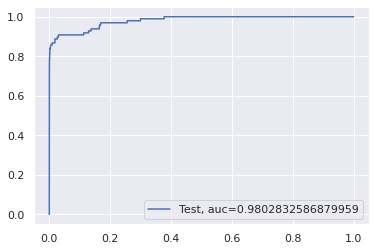

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


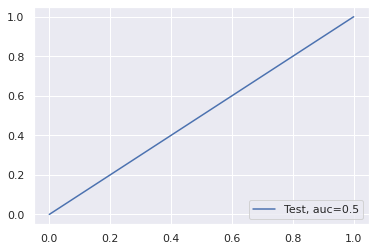

Time Taken by Model: --- 427.2803032398224 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9987184213760292
Confusion Matrix


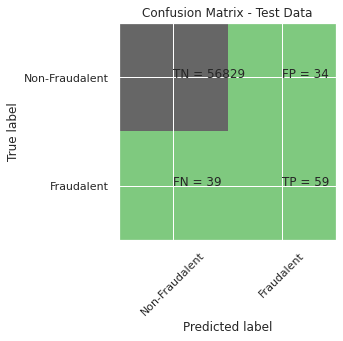

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.63      0.60      0.62        98

    accuracy                           1.00     56961
   macro avg       0.82      0.80      0.81     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8109839366870678
KNN threshold: 0.2
ROC for the test dataset 81.1%


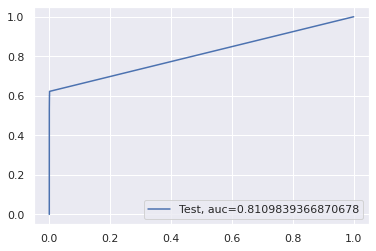

Time Taken by Model: --- 167.6262400150299 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9990870946788153
Confusion Matrix


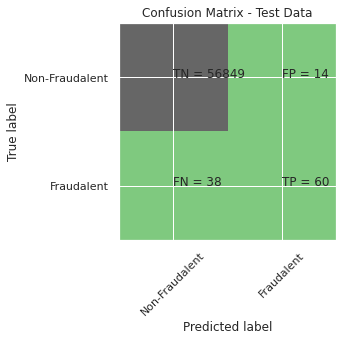

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.81      0.61      0.70        98

    accuracy                           1.00     56961
   macro avg       0.91      0.81      0.85     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8059993460831565
Tree threshold: 1.0
ROC for the test dataset 80.6%


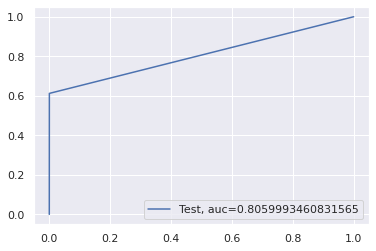

entropy score: 0.9992450975228665
Confusion Matrix


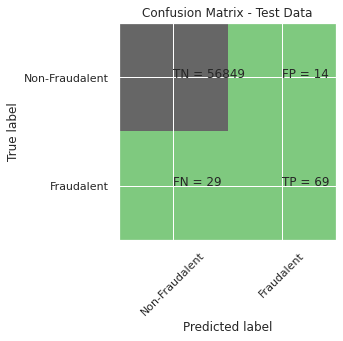

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.83      0.70      0.76        98

    accuracy                           1.00     56961
   macro avg       0.92      0.85      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8519177134300953
Tree threshold: 1.0
ROC for the test dataset 85.2%


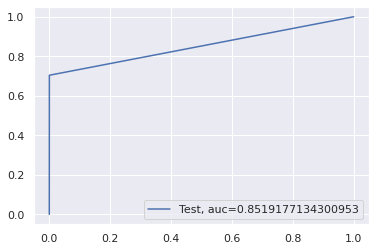

Time Taken by Model: --- 29.219360828399658 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


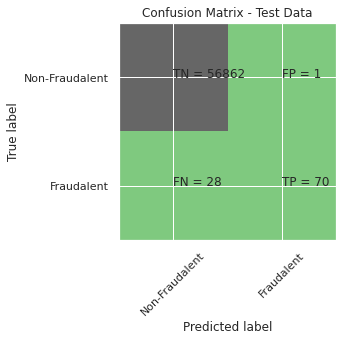

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.71      0.83        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9467762114958007
Random Forest threshold: 0.01
ROC for the test dataset 94.7%


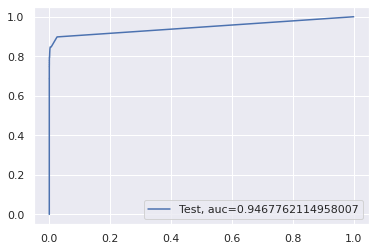

Time Taken by Model: --- 210.08738780021667 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.99661171678868
Confusion Matrix


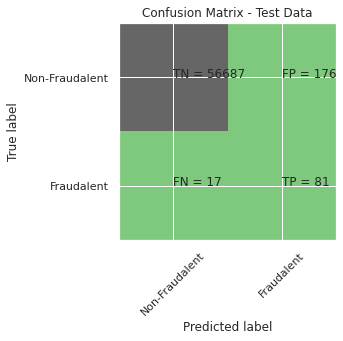

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.32      0.83      0.46        98

    accuracy                           1.00     56961
   macro avg       0.66      0.91      0.73     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9833919657235597
XGBoost threshold: 0.17671935260295868
ROC for the test dataset 98.3%


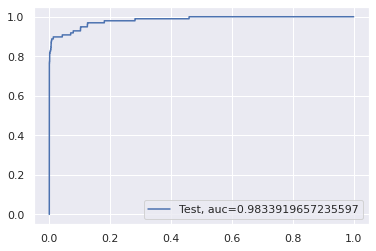

Time Taken by Model: --- 72.89137887954712 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results , Data_Imbalance_Handiling , X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [ ]:
df_Results

Data_Imbalance_Handiling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                              Power Transformer   
8                 RepeatedKFold Cross Validation   
9                 RepeatedKFold Cross Validation   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14                RepeatedKFold Cross Validation   
15                RepeatedKFold Cross Validation   
16              StratifiedKFold Cross Validation   
17              StratifiedKFold Cross Validation   
18              StratifiedKFold Cross Validation   
19              StratifiedKFold Cross Validation   
20              StratifiedKFold Cross Validation   
21              StratifiedKFold Cross Validation   
22              StratifiedKFold Cross Validation   
23              StratifiedKFold Cross Validation   
24                          Random Undersampling   
25                          Random Undersampling   
26                          Random Undersampling   
27                          Random Undersampling   
28                          Random Undersampling   
29                          Random Undersampling   
30                          Random Undersampling   
31                          Random Undersampling   
32  Random Oversampling with StratifiedKFold CV    
33  Random Oversampling with StratifiedKFold CV    
34  Random Oversampling with StratifiedKFold CV    
35  Random Oversampling with StratifiedKFold CV    
36  Random Oversampling with StratifiedKFold CV    
37  Random Oversampling with StratifiedKFold CV    
38  Random Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.999087   0.980827   0.003116  
1   Logistic Regression with L1 Regularisation  0.999122   0.980365   0.009521  
2                                          KNN  0.999544   0.938654   0.200000  
3                Tree Model with gini criteria  0.999070   0.887483   1.000000  
4             Tree Model with entropy criteria  0.999210   0.892646   1.000000  
5                                Random Forest  0.999579   0.952608   0.010000  
6                                      XGBoost  0.999579   0.974716   0.001583  
7                                          SVM  0.998771   0.853552   0.000437  
8   Logistic Regression with L2 Regularisation  0.998964   0.992583   0.002473  
9   Logistic Regression with L1 Regularisation  0.998929   0.950360   0.027713  
10                                         KNN  0.999210   0.910538   0.200000  
11               Tree Model with gini criteria  0.999192   0.910486   1.000000  
12            Tree Model with entropy criteria  0.999228   0.906048   1.000000  
13                               Random Forest  0.999631   0.976721   0.020000  
14                                     XGBoost  0.999579   0.993570   0.001891  
15                                         SVM  0.998192   0.492413   0.002724  
16  Logistic Regression with L2 Regularisation  0.998771   0.983346   0.001583  
17  Logistic Regression with L1 Regularisation  0.998648   0.900912   0.033187  
18                                         KNN  0.999122   0.811005   0.200000  
19               Tree Model with gini criteria  0.998964   0.841591   1.000000  
20            Tree Model with entropy criteria  0.999087   0.821279   1.000000  
21                               Random Forest  0.999456   0.926516   0.010000  
22                                     XGBoost  0.999386   0.980795   0.001500  

### Results for Random Oversampling:

**Random Oversampling seems to have +ve change in prediction for XGBoost** Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique


### Similarly explore other algorithms on balanced dataset by building models like:

-    KNN
-    SVM
-    Decision Tree
-    Random Forest
-    XGBoost




## Oversampling with SMOTE Oversamplng

We will use SMOTE Oversampling method to handle the class imbalance

1.    First we will display class distibution with and without the SMOTE Oversampling.

2.    Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:

1.    Logistic Regression with L2 Regularisation
2.    Logistic Regression with L1 Regularisation
3.    KNN
4.    Decision tree model with Gini criteria
5.    Decision tree model with Entropy criteria
6.    Random Forest

7.    XGBoost

8.    We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

9.    Once we get results for above model, we will compare the results and select model which provided best results for the SMOTE oversampling techinique



## Print the class distribution after applying SMOTE

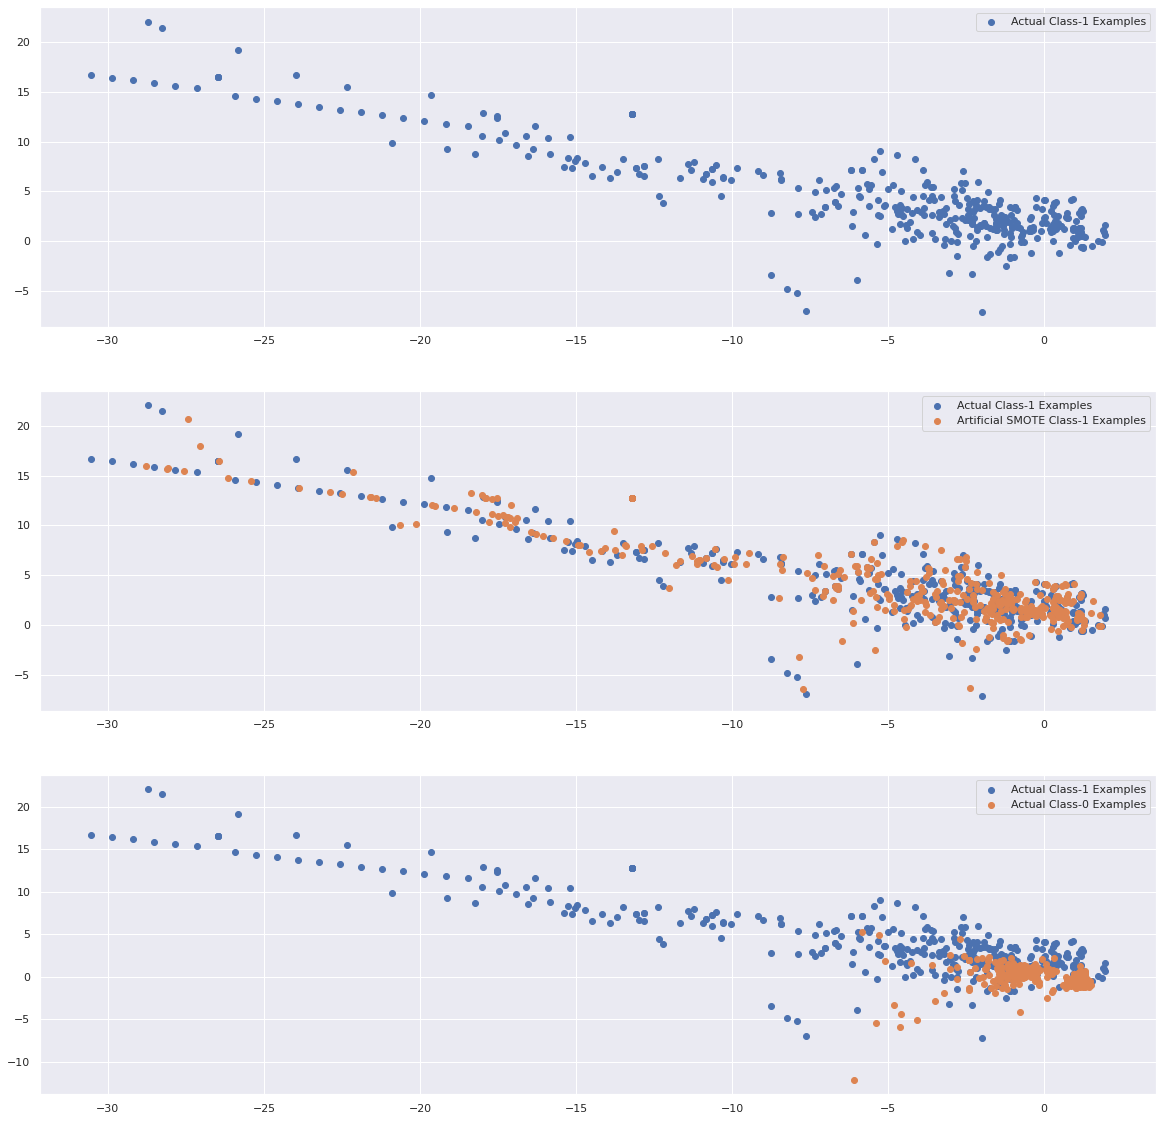

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
SMOTE = over_sampling.SMOTE(random_state=0)

X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train) 

#Create dataframe
#X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_Smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


#Create dataframe
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9929635992506378
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.80684114  0.67047126  0.63171863  0.96533407  0.59335745 -0.71436651
  -0.73573993 -0.47706621 -0.4809635  -1.05519448  0.66600225 -1.23565412
  -0.2529411  -1.48982411  0.10331442 -0.73891286 -0.88304858 -0.49030094
   0.23007888 -1.12728098  0.00671311  0.58915301  0.39038536 -0.80795412
   0.49499965  0.09741726 -0.34764189  0.78272229  0.00893075]]
[-5.10217415]
{1: array([[0.64836479, 0.78425958, 0.92254271, 0.97072402, 0.98645014,
        0.98986219, 0.99072268, 0.99156707, 0.99187042, 0.99195652,
        0.99197055, 0.99197055, 0.99197055, 0.99197055, 0.99197055,
        0.99197055, 0.99197055, 0.99197055, 0.99197055, 0.99197055],
       [0.64535121, 0.78373587, 0.92493545, 0.97315934, 0.98817714,
        0.99119637, 0.99191793, 0.9927044 , 0.99303649, 0.99312141,
        0.99313676, 0.99313676, 0.99313676, 0.99313676, 0.99313676

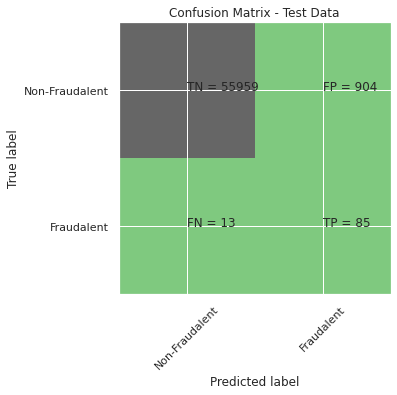

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.09      0.87      0.16        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.57     56961
weighted avg       1.00      0.98      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


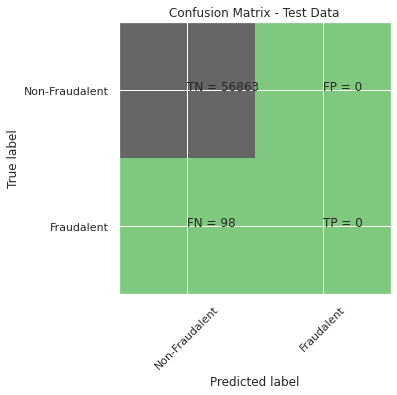

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.975590095349115
l2 threshold: 0.38142442082425765
ROC for the test dataset 97.6%


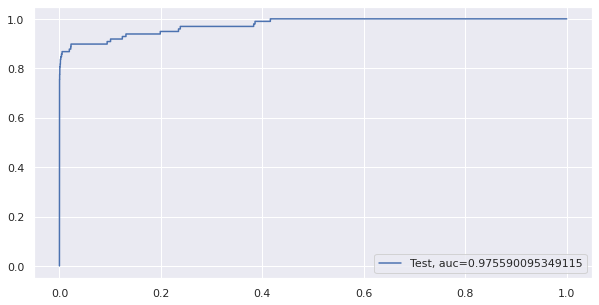

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


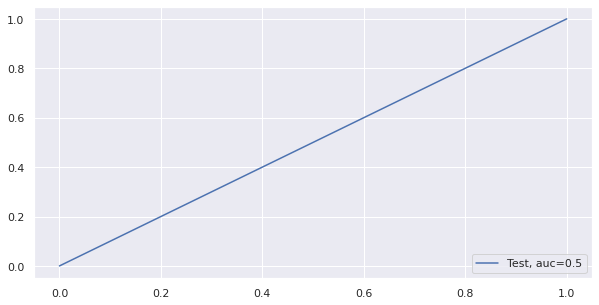

Time Taken by Model: --- 567.4179458618164 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9962079317427713
Confusion Matrix


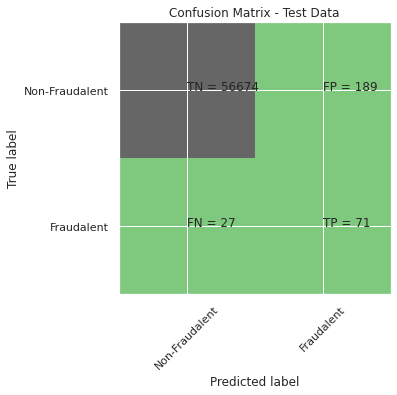

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.27      0.72      0.40        98

    accuracy                           1.00     56961
   macro avg       0.64      0.86      0.70     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8711781126639144
KNN threshold: 0.2
ROC for the test dataset 87.1%


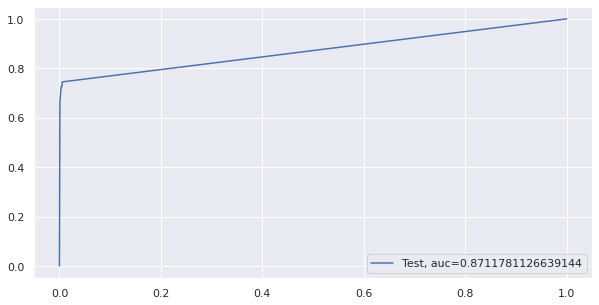

Time Taken by Model: --- 175.58852076530457 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9980512982567019
Confusion Matrix


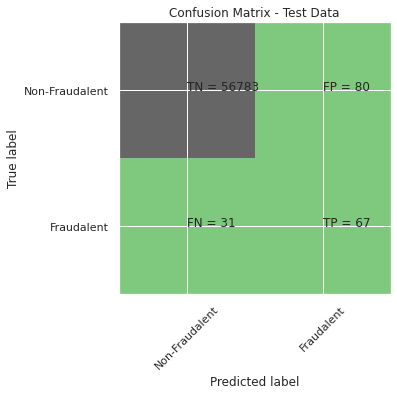

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.46      0.68      0.55        98

    accuracy                           1.00     56961
   macro avg       0.73      0.84      0.77     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8411332895713902
Tree threshold: 1.0
ROC for the test dataset 84.1%


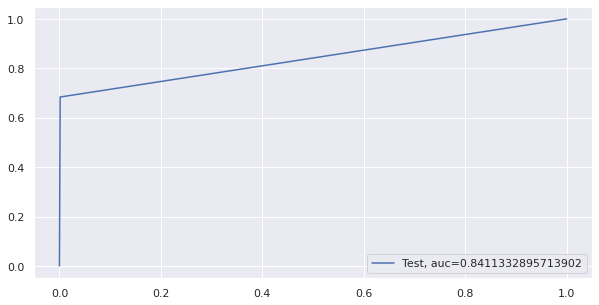

entropy score: 0.9983146363301206
Confusion Matrix


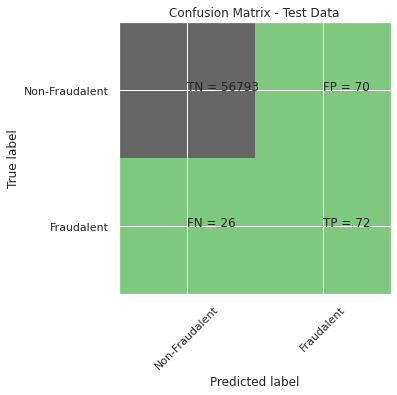

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.51      0.73      0.60        98

    accuracy                           1.00     56961
   macro avg       0.75      0.87      0.80     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8667314242933337
Tree threshold: 1.0
ROC for the test dataset 86.7%


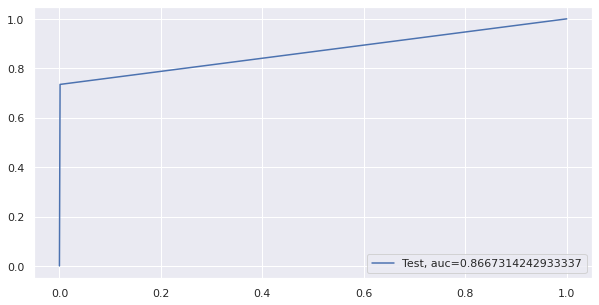

Time Taken by Model: --- 82.04270315170288 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995611032109689
Confusion Matrix


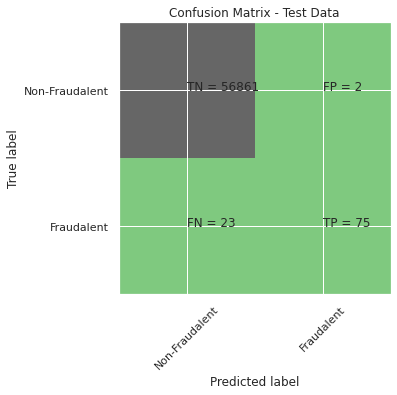

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56961
   macro avg       0.99      0.88      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9474941023663391
Random Forest threshold: 0.03
ROC for the test dataset 94.7%


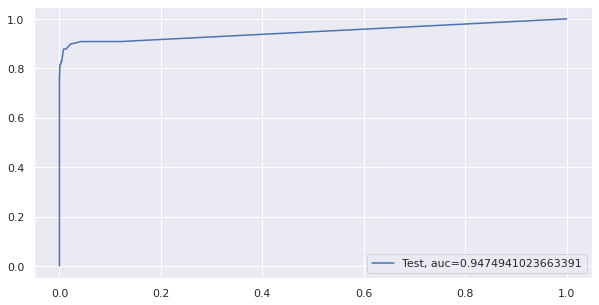

Time Taken by Model: --- 436.61936950683594 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.993802777338881
Confusion Matrix


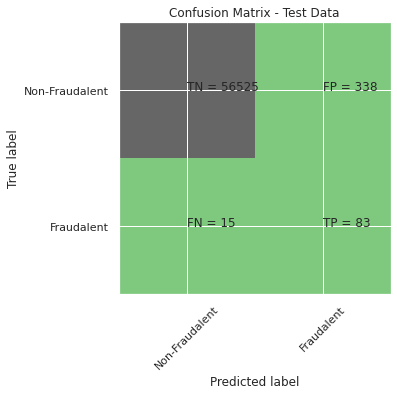

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.85      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.92      0.66     56961
weighted avg       1.00      0.99      1.00     56961

XGboost roc_value: 0.9838894916424618
XGBoost threshold: 0.2753082513809204
ROC for the test dataset 98.4%


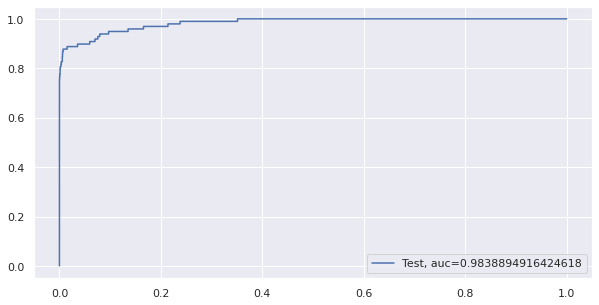

Time Taken by Model: --- 120.60374617576599 seconds ---
--------------------------------------------------------------------------------


In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
plt.rcParams['figure.figsize'] = [10, 5]
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
plt.rcParams['figure.figsize'] = [10, 5]
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
plt.rcParams['figure.figsize'] = [10, 5]
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
plt.rcParams['figure.figsize'] = [10, 5]
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [ ]:
df_Results

Data_Imbalance_Handiling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                              Power Transformer   
8                 RepeatedKFold Cross Validation   
9                 RepeatedKFold Cross Validation   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14                RepeatedKFold Cross Validation   
15                RepeatedKFold Cross Validation   
16              StratifiedKFold Cross Validation   
17              StratifiedKFold Cross Validation   
18              StratifiedKFold Cross Validation   
19              StratifiedKFold Cross Validation   
20              StratifiedKFold Cross Validation   
21              StratifiedKFold Cross Validation   
22              StratifiedKFold Cross Validation   
23              StratifiedKFold Cross Validation   
24                          Random Undersampling   
25                          Random Undersampling   
26                          Random Undersampling   
27                          Random Undersampling   
28                          Random Undersampling   
29                          Random Undersampling   
30                          Random Undersampling   
31                          Random Undersampling   
32  Random Oversampling with StratifiedKFold CV    
33  Random Oversampling with StratifiedKFold CV    
34  Random Oversampling with StratifiedKFold CV    
35  Random Oversampling with StratifiedKFold CV    
36  Random Oversampling with StratifiedKFold CV    
37  Random Oversampling with StratifiedKFold CV    
38  Random Oversampling with StratifiedKFold CV    
39   SMOTE Oversampling with StratifiedKFold CV    
40   SMOTE Oversampling with StratifiedKFold CV    
41   SMOTE Oversampling with StratifiedKFold CV    
42   SMOTE Oversampling with StratifiedKFold CV    
43   SMOTE Oversampling with StratifiedKFold CV    
44   SMOTE Oversampling with StratifiedKFold CV    
45   SMOTE Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.999087   0.980827   0.003116  
1   Logistic Regression with L1 Regularisation  0.999122   0.980365   0.009521  
2                                          KNN  0.999544   0.938654   0.200000  
3                Tree Model with gini criteria  0.999070   0.887483   1.000000  
4             Tree Model with entropy criteria  0.999210   0.892646   1.000000  
5                                Random Forest  0.999579   0.952608   0.010000  
6                                      XGBoost  0.999579   0.974716   0.001583  
7                                          SVM  0.998771   0.853552   0.000437  
8   Logistic Regression with L2 Regularisation  0.998964   0.992583   0.002473  
9   Logistic Regression with L1 Regularisation  0.998929   0.950360   0.027713  
10                                         KNN  0.999210   0.910538   0.200000  
11               Tree Model with gini criteria  0.999192   0.910486   1.000000  
12            Tree Model with entropy criteria  0.999228   0.906048   1.000000  
13                               Random Forest  0.999631   0.976721   0.020000  
14                                     XGBoost  0.999579   0.993570   0.001891  
15                                         SVM  0.998192   0.492413   0.002724  
16  Logistic Regression with L2 Regularisation  0.998771   0.983346   0.001583  
17  Logistic Regression with L1 Regularisation  0.998648   0.900912   0.033187  
18                                      

## Results for SMOTE Oversampling:

Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

## Oversampling with ADASYN Oversampling




**We will use ADASYN Oversampling method to handle the class imbalance**

1.    First we will display class distibution with and without the ADASYN Oversampling.

2.    Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

**Once we have train and test dataset we will feed the data to below models:**

1.    Logistic Regression with L2 Regularisation
2.    Logistic Regression with L1 Regularisation
3.    KNN
4.    Decision tree model with Gini criteria
5.    Decision tree model with Entropy criteria
6.    Random Forest

7.    XGBoost

8.    We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

9.    Once we get results for above model, we will compare the results and select model which provided best results for the oversampling techinique



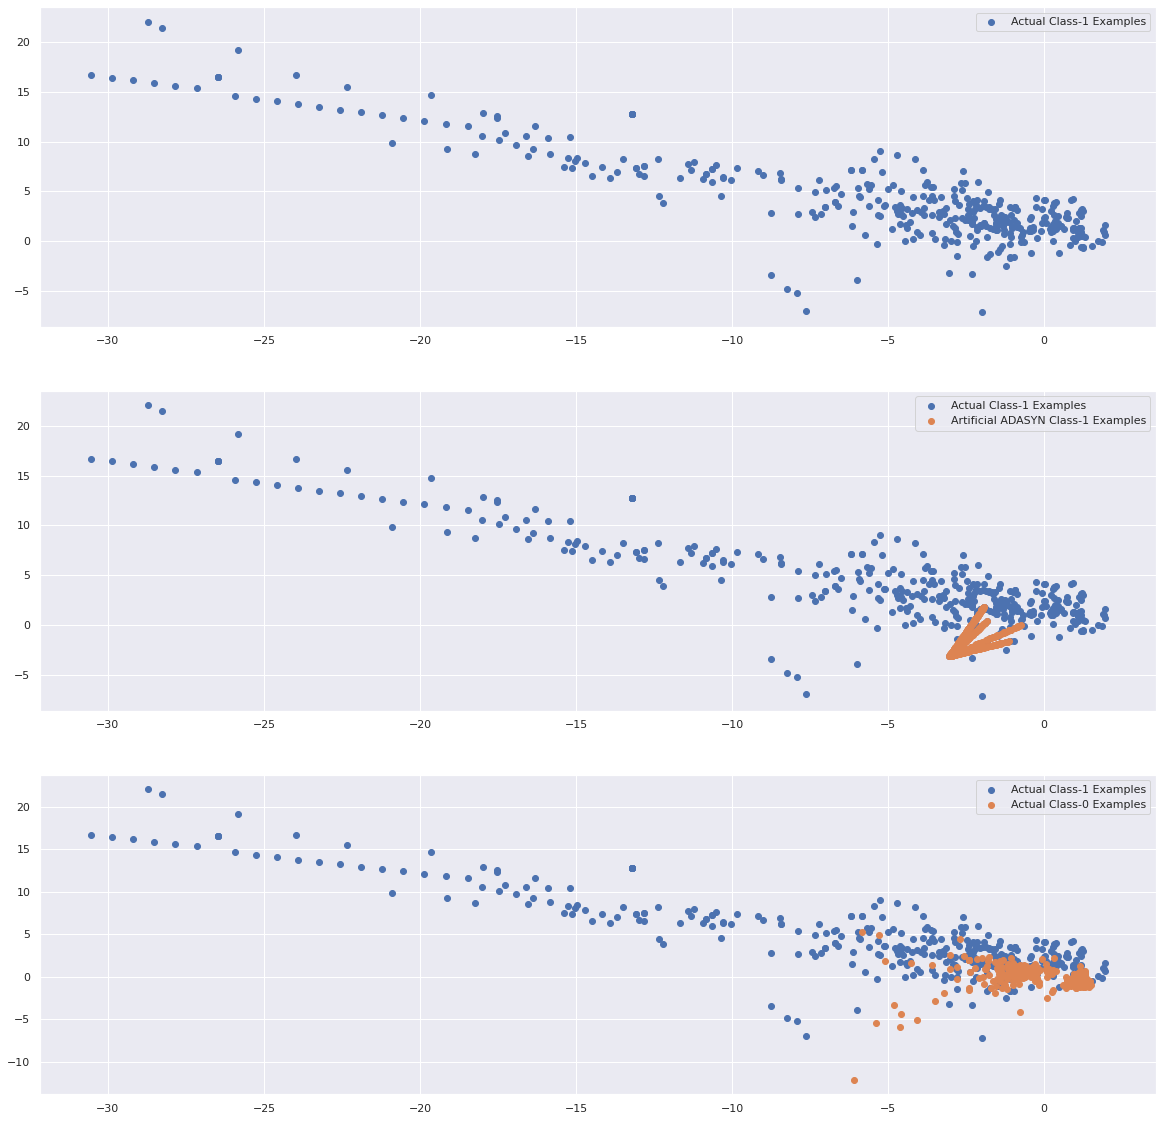

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ADASYN = over_sampling.ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_sample(X_train, y_train) 

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_ADASYN[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

#### Build models on other algorithms to see the better performing on ADASYN

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9812744204114348
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 1.04690979  1.05881316  0.8183571   0.96073355  0.91510154 -0.91532054
  -1.01668253 -0.54719498 -0.41936217 -1.05236958  0.85121208 -1.46292218
  -0.18518428 -1.98526089  0.12921088 -0.96349126 -1.23584787 -0.61746776
   0.37338303 -1.47769536 -0.1927915   0.76960037  0.67438622 -0.98864521
   0.75989502  0.22724649  0.02608938  1.35700222  0.01313349]]
[-4.70535085]
{1: array([[0.62574532, 0.64411708, 0.71954794, 0.86374349, 0.95561027,
        0.97262511, 0.97684669, 0.97989631, 0.9810818 , 0.98145873,
        0.98151321, 0.98151321, 0.98151321, 0.98151321, 0.98151321,
        0.98151321, 0.98151321, 0.98151321, 0.98151321, 0.98151321],
       [0.62660697, 0.6450749 , 0.72034531, 0.86366095, 0.95481762,
        0.97167303, 0.97592514, 0.97903151, 0.98025116, 0.98063079,
        0.98069407, 0.98069407, 0.98069407, 0.98069407, 0.98069407

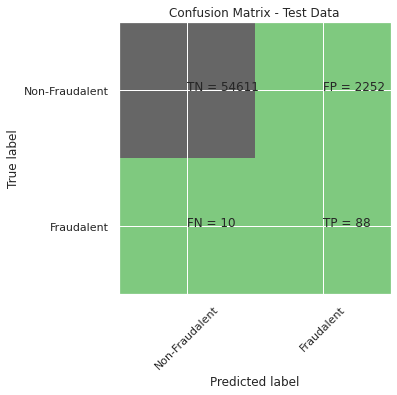

classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.04      0.90      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.93      0.53     56961
weighted avg       1.00      0.96      0.98     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


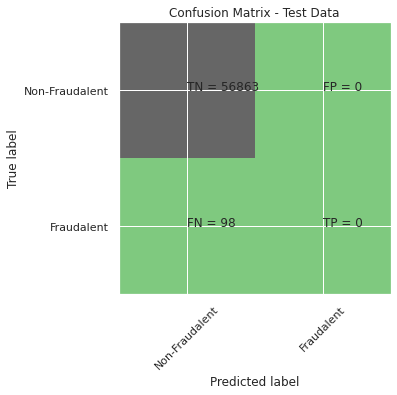

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9755150851294214
l2 threshold: 0.6266630766088256
ROC for the test dataset 97.6%


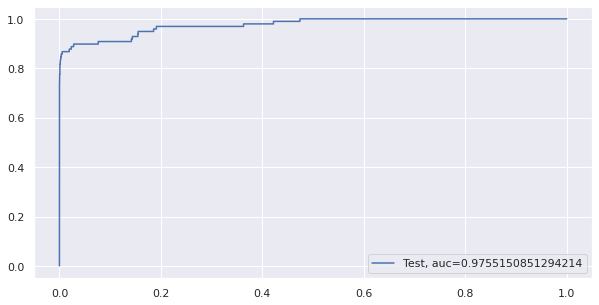

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


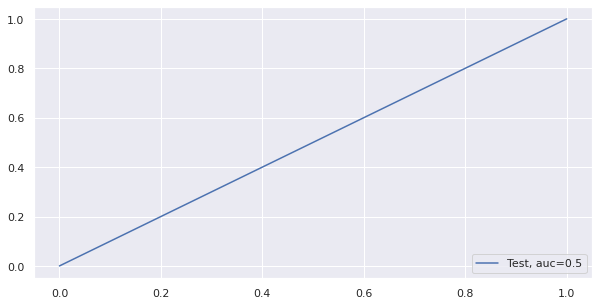

Time Taken by Model: --- 621.4947929382324 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9958041466968628
Confusion Matrix


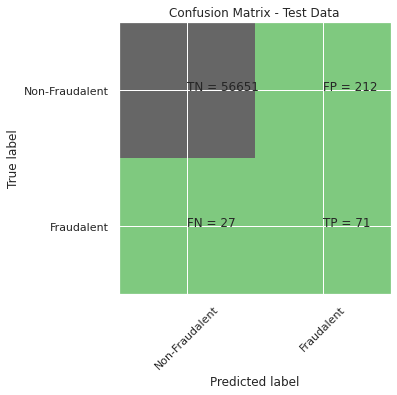

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.25      0.72      0.37        98

    accuracy                           1.00     56961
   macro avg       0.63      0.86      0.69     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8711318144900364
KNN threshold: 0.2
ROC for the test dataset 87.1%


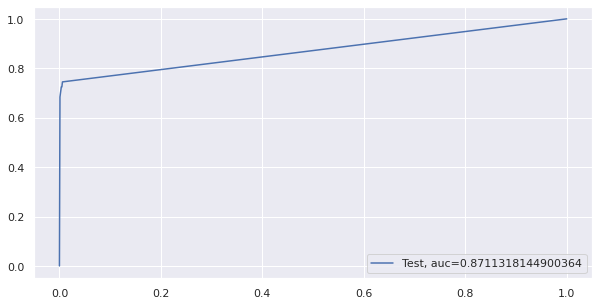

Time Taken by Model: --- 175.05237650871277 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9979810747704569
Confusion Matrix


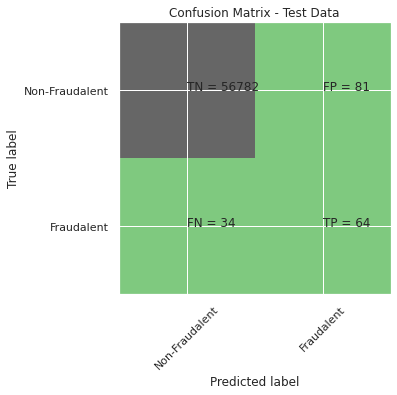

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.44      0.65      0.53        98

    accuracy                           1.00     56961
   macro avg       0.72      0.83      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8258183740583793
Tree threshold: 1.0
ROC for the test dataset 82.6%


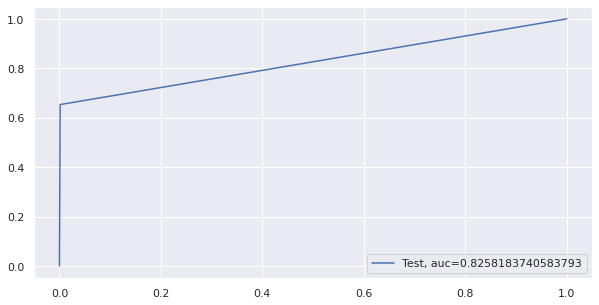

entropy score: 0.9985077509172943
Confusion Matrix


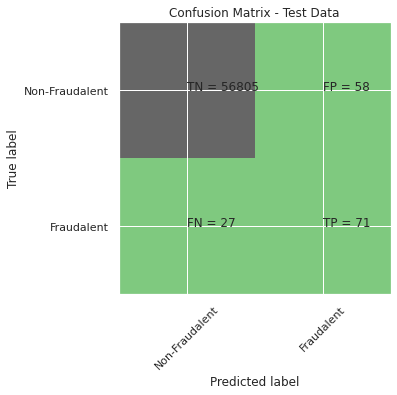

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.55      0.72      0.63        98

    accuracy                           1.00     56961
   macro avg       0.77      0.86      0.81     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8617349002453804
Tree threshold: 1.0
ROC for the test dataset 86.2%


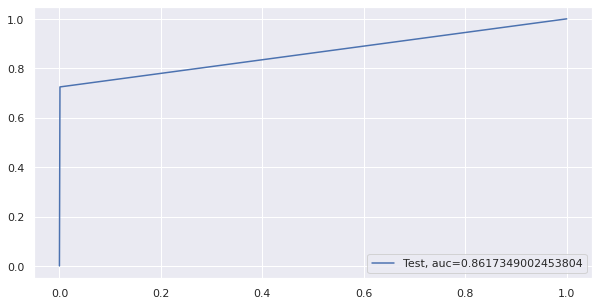

Time Taken by Model: --- 85.87066411972046 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


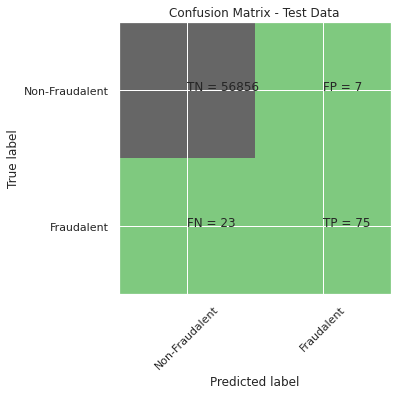

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.77      0.83        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9573326437656996
Random Forest threshold: 0.03
ROC for the test dataset 95.7%


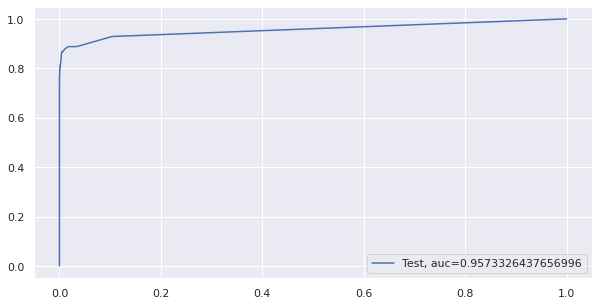

Time Taken by Model: --- 431.6776044368744 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9851126209160653
Confusion Matrix


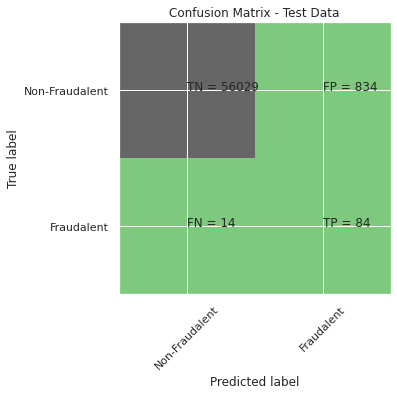

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.09      0.86      0.17        98

    accuracy                           0.99     56961
   macro avg       0.55      0.92      0.58     56961
weighted avg       1.00      0.99      0.99     56961

XGboost roc_value: 0.9818415152495059
XGBoost threshold: 0.45126739144325256
ROC for the test dataset 98.2%


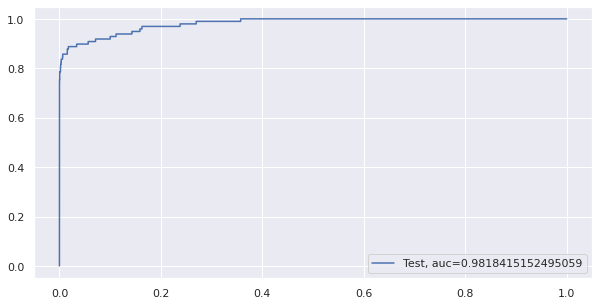

Time Taken by Model: --- 119.13607740402222 seconds ---
--------------------------------------------------------------------------------


In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
Data_Imbalance_Handiling	 = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
plt.rcParams['figure.figsize'] = [10, 5]
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
plt.rcParams['figure.figsize'] = [10, 5]
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
plt.rcParams['figure.figsize'] = [10, 5]
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
plt.rcParams['figure.figsize'] = [10, 5]
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [ ]:
df_Results

Data_Imbalance_Handiling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                              Power Transformer   
8                 RepeatedKFold Cross Validation   
9                 RepeatedKFold Cross Validation   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14                RepeatedKFold Cross Validation   
15                RepeatedKFold Cross Validation   
16              StratifiedKFold Cross Validation   
17              StratifiedKFold Cross Validation   
18              StratifiedKFold Cross Validation   
19              StratifiedKFold Cross Validation   
20              StratifiedKFold Cross Validation   
21              StratifiedKFold Cross Validation   
22              StratifiedKFold Cross Validation   
23              StratifiedKFold Cross Validation   
24                          Random Undersampling   
25                          Random Undersampling   
26                          Random Undersampling   
27                          Random Undersampling   
28                          Random Undersampling   
29                          Random Undersampling   
30                          Random Undersampling   
31                          Random Undersampling   
32  Random Oversampling with StratifiedKFold CV    
33  Random Oversampling with StratifiedKFold CV    
34  Random Oversampling with StratifiedKFold CV    
35  Random Oversampling with StratifiedKFold CV    
36  Random Oversampling with StratifiedKFold CV    
37  Random Oversampling with StratifiedKFold CV    
38  Random Oversampling with StratifiedKFold CV    
39   SMOTE Oversampling with StratifiedKFold CV    
40   SMOTE Oversampling with StratifiedKFold CV    
41   SMOTE Oversampling with StratifiedKFold CV    
42   SMOTE Oversampling with StratifiedKFold CV    
43   SMOTE Oversampling with StratifiedKFold CV    
44   SMOTE Oversampling with StratifiedKFold CV    
45   SMOTE Oversampling with StratifiedKFold CV    
46  ADASYN Oversampling with StratifiedKFold CV    
47  ADASYN Oversampling with StratifiedKFold CV    
48  ADASYN Oversampling with StratifiedKFold CV    
49  ADASYN Oversampling with StratifiedKFold CV    
50  ADASYN Oversampling with StratifiedKFold CV    
51  ADASYN Oversampling with StratifiedKFold CV    
52  ADASYN Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.999087   0.980827   0.003116  
1   Logistic Regression with L1 Regularisation  0.999122   0.980365   0.009521  
2                                          KNN  0.999544   0.938654   0.200000  
3                Tree Model with gini criteria  0.999070   0.887483   1.000000  
4             Tree Model with entropy criteria  0.999210   0.892646   1.000000  
5                                Random Forest  0.999579   0.952608   0.010000  
6                                      XGBoost  0.999579   0.974716   0.001583  
7                                          SVM  0.998771   0.853552   0.000437  
8   Logistic Regression with L2 Regularisation  0.998964   0.992583   0.002473  
9   Logistic Regression with L1 Regularisation  0.998929   0.950360   0.027713  
10                                         KNN  0.999210   0.910538   0.200000  
11               Tree Model with gini criteria  0.999192   0.910486   1.000000  
12            Tree Model with entropy criteria  0.999228   0.906048   1.000000  
13                               Random Forest  0.999631   0.976721   0.020000  


## Results for ADASYN Oversampling:

Looking at Accuracy and ROC value we have XGBoost which has provided best results for ADASYN oversampling technique

## Overall conclusion after running models on Oversampled data:

Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results

### But looking at the results Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.

## Parameter Tuning for Final Model by Handling class imbalance

In [ ]:
from sklearn.metrics import roc_auc_score
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9967697196327312
XGboost roc_value: 0.9838493845034628
XGBoost threshold: 0.1489105224609375


In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)

In [ ]:
#Lets tune XGBoost Model for max_depth and min_child_weight
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([146.95375295, 146.51677232, 147.87674346, 244.93544197,
         242.83151979, 243.78508968, 338.26868839, 331.96107483,
         327.1761559 , 404.46490588, 393.35727644, 347.24638925]),
  'mean_score_time': array([0.55961528, 0.57010074, 0.55968122, 0.85595083, 0.83799481,
         0.83173079, 0.95241323, 0.93416033, 0.93744311, 1.02121801,
         1.03053708, 0.73367128]),
  'mean_test_score': array([0.99966858, 0.99964559, 0.99962857, 0.99989626, 0.99984656,
         0.99986999, 0.99988469, 0.99989494, 0.99989638, 0.99988258,
         0.99987903, 0.99987692]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5, 1, 3, 5],
               mask=[False, False, False, False, False, Fals

In [ ]:
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':range(60,150,20)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 88.98200893, 118.63728857, 147.53573952, 175.59550872,
         178.10968642]),
  'mean_score_time': array([0.34725652, 0.46795211, 0.57765107, 0.67962923, 0.56107922]),
  'mean_test_score': array([0.99884855, 0.99946556, 0.99962857, 0.99972312, 0.99979507]),
  'param_n_estimators': masked_array(data=[60, 80, 100, 120, 140],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 60},
   {'n_estimators': 80},
   {'n_estimators': 100},
   {'n_estimators': 120},
   {'n_estimators': 140}],
  'rank_test_score': array([5, 4, 3, 2, 1], dtype=int32),
  'split0_test_score': array([0.9979188 , 0.99893686, 0.99918136, 0.99932217, 0.99943096]),
  'split1_test_score': array([0.9994477 , 0.99980357, 0.99989898, 0.99993741, 0.9999643 ]),
  'split2_test_score': array([0.99963013, 0.99987155, 0.99992886, 0.99994693, 0.99995817]),
  'split3_test_score': array([0.99880026, 0.99928897, 0.999525

In [ ]:
# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':[110,120,130],
  'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=120, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([160.20456247, 172.36706085, 189.18409905, 159.5492435 ,
         173.51212058, 188.41729536, 160.62660537, 173.63910046,
         185.81566243, 227.35993791, 251.82117662, 270.51101933,
         228.63740959, 249.84115095, 271.41309929, 227.84217143,
         253.04180613, 274.19615574, 306.03746552, 335.79837456,
         359.35951962, 302.77756457, 330.77015042, 358.69486804,
         302.68569379, 329.32902188, 322.00106459]),
  'mean_score_time': array([0.56737809, 0.64807296, 0.66470404, 0.57285948, 0.62463593,
         0.68470898, 0.57870326, 0.61735625, 0.67113557, 0.74614253,
         0.81580963, 0.87972107, 0.75113974, 0.81832037, 0.87843461,
         0.73754687, 0.82314405, 0.86333494, 0.94178228, 1.05045891,
         1.09081879, 0.9316062 , 1.01773987, 1.08817911, 0.93301649,
         1.00750504, 0.76308036]),
  'mean_test_score': array([0.99851928, 0.99876906, 0.99897242, 0.99851439, 0.99876448,
         0.99897051, 0.99849521, 0.99874651, 0.998931

In [ ]:
#With 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130 parameters tuned above we will now check learning rate

# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'learning_rate':[0.05,0.1,0.125,0.15,0.2]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([362.11901312, 363.62658405, 365.50443769, 364.67421036,
         307.29657168]),
  'mean_score_time': array([0.9823112 , 1.08952656, 1.11721854, 1.12607384, 0.84571829]),
  'mean_test_score': array([0.9996779 , 0.99987051, 0.99985266, 0.9998893 , 0.99991244]),
  'param_learning_rate': masked_array(data=[0.05, 0.1, 0.125, 0.15, 0.2],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.05},
   {'learning_rate': 0.1},
   {'learning_rate': 0.125},
   {'learning_rate': 0.15},
   {'learning_rate': 0.2}],
  'rank_test_score': array([5, 3, 4, 2, 1], dtype=int32),
  'split0_test_score': array([0.99910559, 0.99951396, 0.99938325, 0.9995427 , 0.99965337]),
  'split1_test_score': array([0.9999135 , 0.9999898 , 0.99999319, 0.99999943, 1.        ]),
  'split2_test_score': array([0.99992648, 0.99996454, 0.99997381, 0.99997358, 0.99997705]),
  'split3_test_score': array([0.99963643, 0.

In [ ]:
#With 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130 parameters tuned above we will now check learning rate

# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
'gamma':[i/10.0 for i in range(0,5)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([330.26737723, 328.3485806 , 326.45789156, 325.6466651 ,
         273.62372255]),
  'mean_score_time': array([1.13852072, 1.12240205, 1.17604394, 1.1612318 , 0.83793449]),
  'mean_test_score': array([0.99990797, 0.99990824, 0.99989391, 0.99990825, 0.99989958]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'rank_test_score': array([3, 2, 5, 1, 4], dtype=int32),
  'split0_test_score': array([0.99963711, 0.99964597, 0.99957057, 0.99963344, 0.9996048 ]),
  'split1_test_score': array([1.        , 1.        , 0.99999993, 1.        , 1.        ]),
  'split2_test_score': array([0.99997727, 0.99997595, 0.99997489, 0.99997478, 0.99997648]),
  'split3_test_score': array([0.99992973, 0.99992365, 0.99992905, 0.99993312, 0.99991988]),
  'split

In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
# fit model no training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9994031003669177
XGboost roc_value: 0.9827610185167572
XGBoost threshold: 0.0018781241960823536


In [ ]:
#With 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130 , gamma: 0.1 parameters tuned above we will now check learning rate

# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'subsample':[i/10.0 for i in range(7,10)],
 'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([262.70952511, 270.89688373, 276.9903625 , 300.10276031,
         300.85959682, 308.41104178, 347.41754479, 341.37114449,
         307.19200149]),
  'mean_score_time': array([1.14588041, 1.16543555, 1.11966329, 1.17293463, 1.203826  ,
         1.17095056, 1.25000992, 1.18109627, 0.87216244]),
  'mean_test_score': array([0.9999092 , 0.99991258, 0.99990998, 0.99991649, 0.99990857,
         0.99990894, 0.99990771, 0.99991638, 0.99991179]),
  'param_colsample_bytree': masked_array(data=[0.7, 0.7, 0.7, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.7, 0.8, 0.9],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'colsample_bytree': 0

In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.999420656238479
XGboost roc_value: 0.9831969929874417
XGBoost threshold: 0.002815054729580879


#### As the roc value has dropped we will take not consider new values of colsample_bytree': 0.8, 'subsample': 0.8

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_over, y_over ) # fit on the balanced dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9994031003669177
XGboost roc_value: 0.9827610185167572
XGBoost threshold: 0.0018781241960823536


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


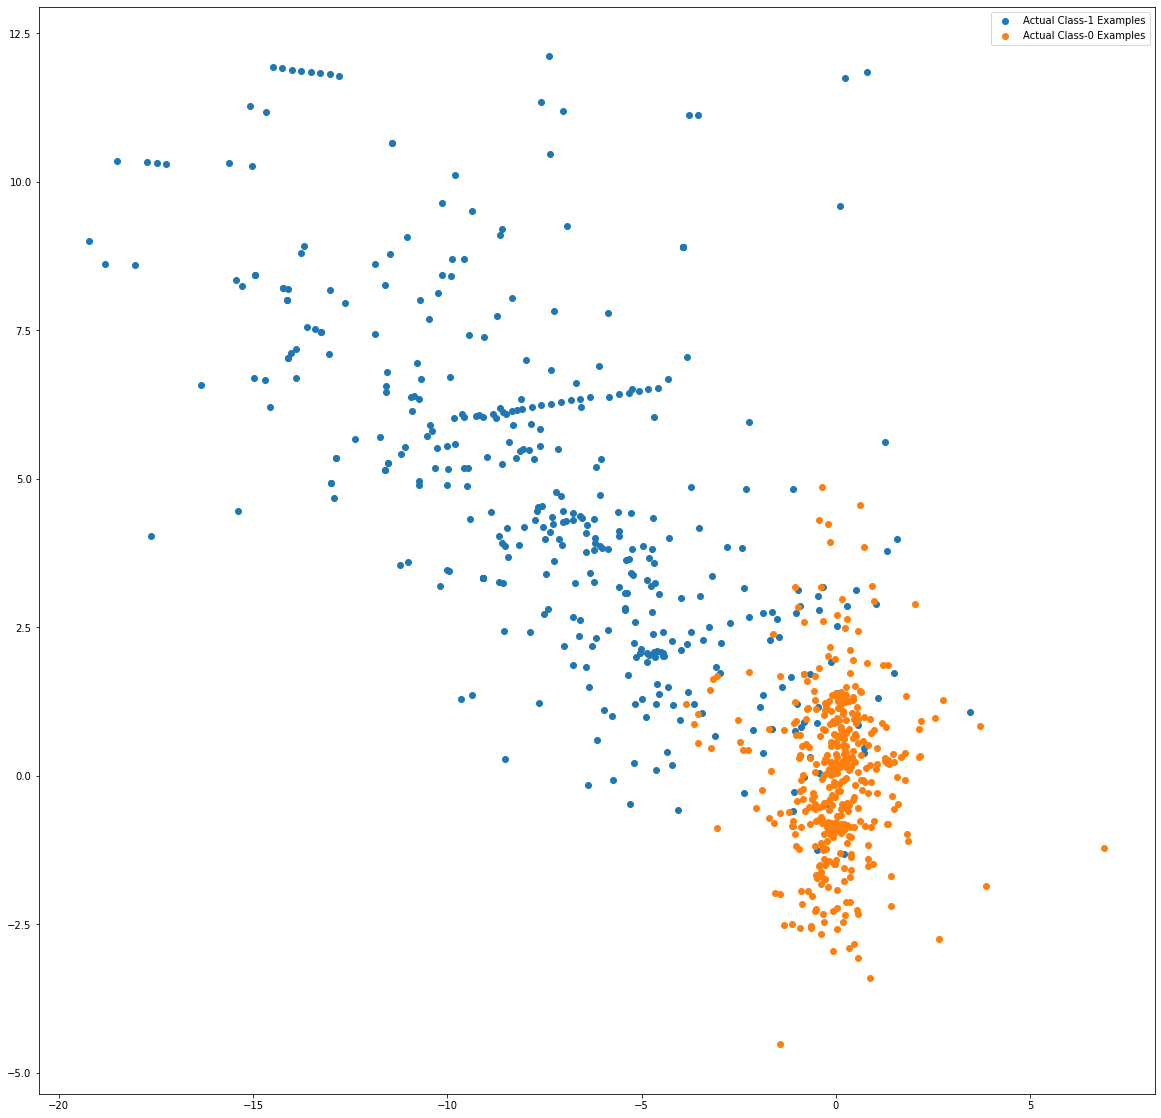

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9827610185167572
XGBoost threshold: 0.0018781241960823536


## Model Selection:
#### Overall conclusion after running models on Oversampled data:


Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results

We have selected XGBOOST model with Random Oversampling and StratifiedKFold CV

- **Model Accuracy:** 0.9994031003669177

- **XGboost roc_value:** 0.9827610185167572

- **XGBoost threshold:** 0.0018781241960823536


We also noticed by looking at the results Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.


## Cost benefit analysis

We have tried several models till now with both balanced and imbalanced data. We have noticed most of the models have performed more or less well in terms of ROC score, Precision and Recall.

But while picking the best model we should consider few things such as whether we have required infrastructure, resources or computational power to run the model or not. For the models such as Random forest, SVM, XGBoost we require heavy computational resources and eventually to build that infrastructure the cost of deploying the model increases. On the other hand the simpler model such as Logistic regression requires less computational resources, so the cost of building the model is less.

We also have to consider that for little change of the ROC score how much monetary loss of gain the bank incur. If the amount if huge then we have to consider building the complex model even though the cost of building the model is high.



## Summary to the business

For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction was done by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So we have to consider the losses if the missed transaction was a high-value fraudulent one.

So here, to save the banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.

After performing several models, we have seen that in the balanced dataset with **Random Oversampling** technique the **XGBoost** model has good ROC score and also high Recall. Hence, we can go with the **XGBoost** model here. 